# Perfil comercial de um país

Perfil comercial de um país. O objetivo é analisar as trocas comerciais de um país com o resto do mundo.

Mais informação em [country_trade_profile_README.md](country_trade_profile_README.md)

## Setup

For instructions and how to obtain an API key, see [here](0-comtrade-setup-first.ipynb).

In [222]:
import comtradetools as comtradetools

comtradetools.setup()
APIKEY = comtradetools.get_api_key()
comtradetools.init(APIKEY, force_init=False)

## Country and period of interest

Choose country and years of interest

In [223]:
import comtradetools


country_of_interest_name = 'Angola'
country_of_interest = comtradetools.encode_country(country_of_interest_name)

years_of_interest=comtradetools.year_range(2003,2023)
print(country_of_interest_name, years_of_interest)

Angola 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023


## 1.Trade balance

### 1a Trade balance symmetric values

In [224]:
import comtradetools
import pandas as pd
import numpy as np

pd.options.display.float_format = '{:,.2f}'.format

periods = comtradetools.split_period(years_of_interest,6)
global_trade = pd.DataFrame()
for period in periods:
    print(f"Fetching data for period {period}")

    temp = comtradetools.get_trade_flows(country_of_interest,
                                            period=period,
                                            symmetric_values=True)

    global_trade = pd.concat([global_trade,temp])


global_trade = global_trade.replace(0, np.nan)
cols_of_interest = global_trade.columns



INFO:root:Calling getFinalData for period 2003,2004,2005,2006,2007,2008
INFO:root:Using cached results for period 2003,2004,2005,2006,2007,2008
INFO:root:Calling getFinalData for period 2003,2004,2005,2006,2007,2008
INFO:root:Using cached results for period 2003,2004,2005,2006,2007,2008
INFO:root:Calling getFinalData for period 2003,2004,2005,2006,2007,2008
INFO:root:Using cached results for period 2003,2004,2005,2006,2007,2008
INFO:root:Calling getFinalData for period 2003,2004,2005,2006,2007,2008
INFO:root:Using cached results for period 2003,2004,2005,2006,2007,2008
INFO:root:Calling getFinalData for period 2009,2010,2011,2012,2013,2014
INFO:root:Using cached results for period 2009,2010,2011,2012,2013,2014
INFO:root:Calling getFinalData for period 2009,2010,2011,2012,2013,2014
INFO:root:Using cached results for period 2009,2010,2011,2012,2013,2014
INFO:root:Calling getFinalData for period 2009,2010,2011,2012,2013,2014
INFO:root:Using cached results for period 2009,2010,2011,2012,20

Fetching data for period 2003,2004,2005,2006,2007,2008
Fetching data for period 2009,2010,2011,2012,2013,2014
Fetching data for period 2015,2016,2017,2018,2019,2020
Fetching data for period 2021,2022,2023


In [225]:
global_trade['varM_perc']=global_trade['M']/global_trade['M<X']
global_trade['varX_perc']=global_trade['X']/global_trade['X<M']
print(f"M = Imports as reported by {country_of_interest_name}")
print(f"X = Exports as reported by {country_of_interest_name}")
print(f"X<M = Exports as reported by rest of the world imports from {country_of_interest_name}")
print(f"M<X = Imports as reported by rest of the world exports to {country_of_interest_name}")
global_trade


M = Imports as reported by Angola
X = Exports as reported by Angola
X<M = Exports as reported by rest of the world imports from Angola
M<X = Imports as reported by rest of the world exports to Angola


flowCode,M,M<X,X,X<M,trade_balance (X-M),trade_balance (X<M-M),trade_volume (X+M),trade_volume (X<M+M),varM_perc,varX_perc
period,,,,,,,,,,
2003,NaN,"4,431,063,866.32",NaN,"9,322,134,085.35",NaN,"9,322,134,085.35",NaN,"9,322,134,085.35",NaN,NaN
2004,NaN,"6,674,906,901.50",NaN,"12,774,810,411.91",NaN,"12,774,810,411.91",NaN,"12,774,810,411.91",NaN,NaN
2005,NaN,"7,767,184,001.86",NaN,"22,086,367,001.78",NaN,"22,086,367,001.78",NaN,"22,086,367,001.78",NaN,NaN
2006,NaN,"10,636,294,703.97",NaN,"32,047,827,417.37",NaN,"32,047,827,417.37",NaN,"32,047,827,417.37",NaN,NaN
2007,"11,094,843,413.00","12,662,439,392.45","44,177,783,071.00","41,711,887,538.55","33,082,939,658.00","30,617,044,125.55","55,272,626,484.00","52,806,730,951.55",0.88,1.06
2008,NaN,"20,453,103,082.93",NaN,"67,748,978,154.39",NaN,"67,748,978,154.39",NaN,"67,748,978,154.39",NaN,NaN
2009,"23,918,854,361.00","17,838,362,501.79","40,639,411,732.00","39,936,869,089.04","16,720,557,371.00","16,018,014,728.04","64,558,266,093.00","63,855,723,450.04",1.34,1.02
2010,"18,143,268,908.00","15,870,330,898.55","52,612,114,761.00","53,460,941,627.27","34,468,845,853.00","35,317,672,719.27","70,755,383,669.00","71,604,210,535.27",1.14,0.98
2011,"20,790,996,039.00","18,333,349,046.96","66,427,390,220.00","66,207,593,128.22","45,636,394,181.00","45,416,597,089.22","87,218,386,259.00","86,998,589,167.22",1.13,1.00


Save to Excel file

In [253]:
start_year=global_trade.index.min()
end_year=global_trade.index.max()
excel_file = f"reports/{country_of_interest_name}_1.1_trade_balance_{start_year}-{end_year}.xlsx"
global_trade.to_excel(excel_file)
print("Trade ballance report saved to ", excel_file)

Trade ballance report saved to  reports/Angola_1.1_trade_balance_2003-2023.xlsx


### Trade balance graph

Plot saved to  reports/Angola_1.2_trade_balance_2003-2023.png
0 Line2D(M) 0.0
1 Line2D(M<X) 0.8
2 Line2D(X) 0.0
3 Line2D(X<M) 0.8
4 Line2D(trade_balance (X-M)) 0.0
5 Line2D(trade_balance (X<M-M)) 0.8
6 Line2D(trade_volume (X+M)) 0.0
7 Line2D(trade_volume (X<M+M)) 0.8


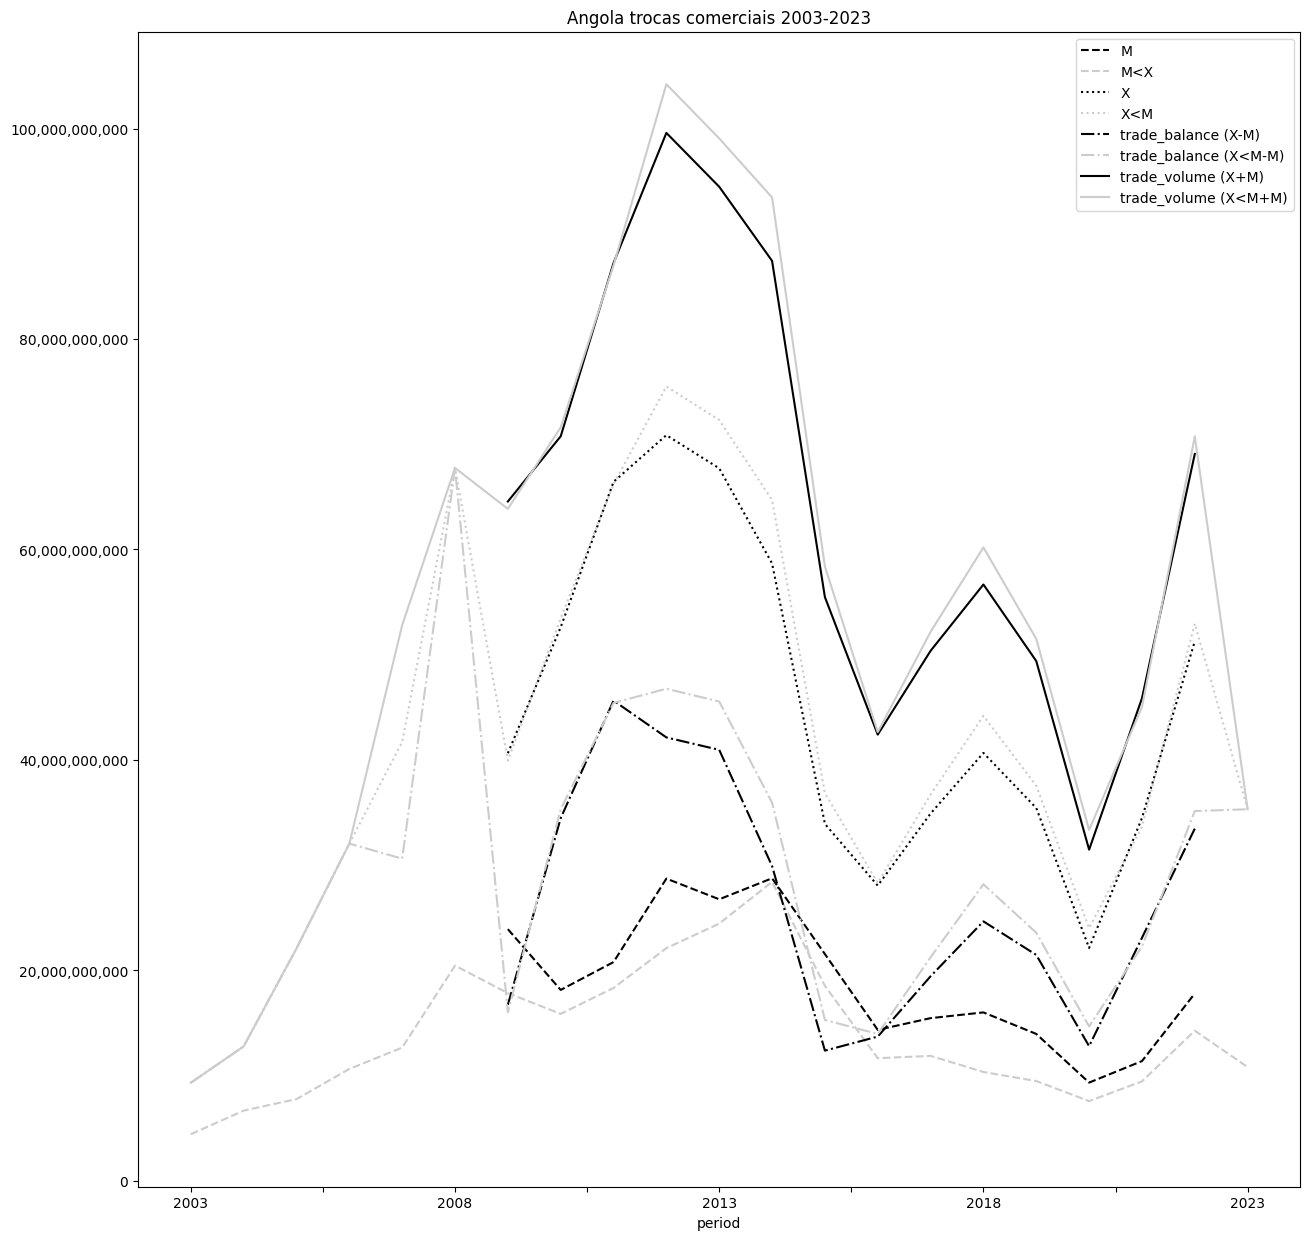

In [254]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plotfile = f"reports/{country_of_interest_name}_1.2_trade_balance_{start_year}-{end_year}.png"

start_year=global_trade.index.min()
end_year=global_trade.index.max()
title=f"{country_of_interest_name} trocas comerciais {start_year}-{end_year}"
print("Plot saved to ", plotfile)
fig = global_trade[cols_of_interest].plot.line(figsize=(15,15),title=title)

# use a grayscale palette of colors
colors = ['0.0','0.8','0.0','0.8','0.0','0.8','0.0','0.8']

# use different line styles and black lines
linestyles = ['dashed', 'dashed', 'dotted', 'dotted', 'dashdot', 'dashdot', 'solid', 'solid']
for i, line in enumerate(fig.get_lines()):
    print(i, line, colors[i])
    line.set_color(colors[i])
    line.set_linestyle(linestyles[i % len(linestyles)])

formatter = ticker.StrMethodFormatter('{x:,.0f}')
fig.yaxis.set_major_formatter(formatter)
fig.legend(list(global_trade.columns.astype(str)))

plt.savefig(plotfile)
plt.show()

## 2. Exports


### 2.1 Main export partners/clients

Colect destinations of exports of the country. 

Use either reported exports
of country of interest, or reported imports from country of interest by
all other countries (symmetric reporting). 

Set variable `symmetric_reporting` to choose.

In [245]:
# If symmetric_reporting is "True" we get the exports from
#    the reported imports of all the countries
# i.e. instead of asking Country of Interest for export data we ask the world
#    for import data from Country of Interest

symmetric_reporting = True  # set to false to use reported exports by Country of Interest

if symmetric_reporting:
    reporterCode = None
    partnerCode = country_of_interest
    flowCode = 'M'
    reporter_column = 'partner'
    partner_column = 'reporter'
else:
    reporterCode = country_of_interest
    partnerCode = None
    flowCode = 'X'
    reporter_column = 'reporter'
    partner_column = 'partner'


In [246]:

# years_of_interest = comtrade.year_range(2020, 2021)
df = comtradetools.getFinalData(APIKEY,
                                reporterCode=reporterCode,
                                typeCode='C',  # commodities
                                freqCode='A',  # annual
                                flowCode=flowCode,
                                period=years_of_interest,
                                partnerCode=partnerCode,
                                remove_world=True,
                                partner2Code=0,  # world
                                clCode="HS",
                                cmdCode="TOTAL",
                                motCode=0,  # all means of transport
                                customsCode='C00', # all customs
                                includeDesc=True,
                                cache=True
                                )

INFO:root:Calling getFinalData for period 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
INFO:root:Using cached results for period 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
INFO:root:Calling getFinalData for period 2015,2016,2017,2018,2019,2020,2021,2022,2023
INFO:root:Using cached results for period 2015,2016,2017,2018,2019,2020,2021,2022,2023


Compute percentage o trade and rank of partners for each year.

Use `show_only_top` to show only the top partners (e.g. 5).

In [247]:
import pandas as pd
import comtradetools
# show 500 lines
pd.options.display.max_rows=500
pd.options.display.float_format='{:,.2f}'.format

show_only_top = 5

# aggregate by year, flow, reporter
exports = comtradetools.total_rank_perc(df,groupby=['refYear','flowCode',f'{partner_column}Desc'],
                                    col='primaryValue',
                                    prefix='partner',
                                    drop_duplicates=True)

cols=['refYear','flowCode',f'{partner_column}Desc','cmdCode','partner_upper_sum','partner_sum','partner_rank','partner_perc','partner_upper_perc']

formats =  comtradetools.make_format(cols)

top_export_partners = exports[exports['partner_rank']<=show_only_top][f'{partner_column}Desc'].unique()
top_export_partners_codes = exports[exports['partner_rank']<=show_only_top][f'{partner_column}Code'].unique()

print(f"Top {show_only_top} export partners of {country_of_interest_name} in {years_of_interest}: \n{top_export_partners}")
exports[exports['partner_rank']<=show_only_top][cols].sort_values(['refYear','flowCode','partner_rank',f'{partner_column}Desc','cmdCode']).style.format(formats)

Top 5 export partners of Angola in 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023: 
['China' 'France' 'Rep. of Korea' 'Other Asia, nes' 'USA' 'Chile'
 'South Africa' 'Canada' 'India' 'Portugal' 'Spain' 'United Arab Emirates'
 'Thailand' 'Netherlands']


,refYear,flowCode,reporterDesc,cmdCode,partner_upper_sum,partner_sum,partner_rank,partner_perc,partner_upper_perc
88,2003,M,USA,TOTAL,"$9,322,134,085","$4,508,909,969",1,48.368%,48.368%
10,2003,M,China,TOTAL,"$9,322,134,085","$2,205,934,880",2,23.663%,23.663%
50,2003,M,"Other Asia, nes",TOTAL,"$9,322,134,085","$754,817,300",3,8.097%,8.097%
25,2003,M,France,TOTAL,"$9,322,134,085","$693,959,478",4,7.444%,7.444%
42,2003,M,Rep. of Korea,TOTAL,"$9,322,134,085","$267,633,814",5,2.871%,2.871%
185,2004,M,USA,TOTAL,"$12,774,810,412","$4,796,799,975",1,37.549%,37.549%
108,2004,M,China,TOTAL,"$12,774,810,412","$4,717,339,146",2,36.927%,36.927%
144,2004,M,"Other Asia, nes",TOTAL,"$12,774,810,412","$864,305,200",3,6.766%,6.766%
122,2004,M,France,TOTAL,"$12,774,810,412","$815,351,242",4,6.382%,6.382%
107,2004,M,Chile,TOTAL,"$12,774,810,412","$430,833,024",5,3.373%,3.373%


Pivot the countries to columns, keeping the total value and percentage in separate columns.

----

Passamos os países para colunas, mantendo a percentagem e o valor em separado.

In [248]:
pivoted = df.pivot_table(index=['refYear','flowDesc'], columns=f'{partner_column}Desc', values=['primaryValue','partner_perc'])
pivoted.swaplevel(axis=1).fillna(0,inplace=True)
pivoted.sort_index(axis=1, level=0, inplace=True)
pivoted.fillna(0)

partner_perc                                              \
reporterDesc          Albania Algeria Angola Anguilla Antigua and Barbuda   
refYear flowDesc                                                            
2003    Import           0.00    0.00   0.00     0.00                0.00   
2004    Import           0.00    0.00   0.00     0.00                0.00   
2005    Import           0.00    0.00   0.00     0.00                0.00   
2006    Import           0.00    0.00   0.00     0.00                0.00   
2007    Import           0.00    0.00   0.00     0.00                0.00   
2008    Import           0.00    0.00   0.00     0.00                0.00   
2009    Import           0.00    0.00   0.00     0.00                0.00   
2010    Import           0.00    0.00   0.00     0.00                0.00   
2011    Import           0.00    0.00   0.00     0.00                0.00   
2012    Import           0.00    0.00   0.00     0.00                0.00   
2013    Import           0.00    0.00   0.00     0.00                0.00   
2014    Import           0.00    0.00   0.00     0.00                0.00   
2015    Import           0.00    0.00   0.00     0.00                0.00   
2016    Import           0.00    0.00   0.00     0.00                0.00   
2017    Import           0.00    0.00   0.00     0.00                0.00   
2018    Import           0.00    0.00   0.00     0.00                0.00   
2019    Import           0.00    0.00   0.00     0.00                0.00   
2020    Import           0.00    0.00   0.00     0.00                0.00   
2021    Import           0.00    0.00   0.00     0.00                0.00   
2022    Import           0.00    0.00   0.00     0.00                0.00   
2023    Import           0.00    0.00   0.00     0.00                0.00   

                                                                 ...  \
reporterDesc     Argentina Armenia Australia Austria Azerbaijan  ...   
refYear flowDesc                                                 ...   
2003    Import        0.00    0.00      0.00    0.00       0.00  ...   
2004    Import        0.00    0.00      0.00    0.00       0.00  ...   
2005    Import        0.00    0.00      0.00    0.00       0.00  ...   
2006    Import        0.00    0.00      0.00    0.00       0.00  ...   
2007    Import        0.00    0.00      0.00    0.00       0.00  ...   
2008    Import        0.00    0.00      0.00    0.00       0.00  ...   
2009    Import        0.00    0.00      0.00    0.00       0.00  ...   
2010    Import        0.00    0.00      0.00    0.00       0.00  ...   
2011    Import        0.00    0.00      0.00    0.00       0.00  ...   
2012    Import        0.00    0.00      0.00    0.00       0.00  ...   
2013    Import        0.00    0.00      0.00    0.00       0.00  ...   
2014    Import        0.00    0.00      0.00    0.00       0.00  ...   
2015    Import        0.00    0.00      0.00    0.00       0.00  ...   
2016    Import        0.00    0.00      0.00    0.00       0.00  ...   
2017    Import        0.00    0.00      0.00    0.00       0.00  ...   
2018    Import        0.00    0.00      0.00    0.00       0.00  ...   
2019    Import        0.00    0.00      0.00    0.00       0.00  ...   
2020    Import        0.00    0.00      0.00    0.00       0.00  ...   
2021    Import        0.00    0.00      0.00    0.00       0.00  ...   
2022    Import        0.00    0.00      0.00    0.00       0.00  ...   
2023    Import        0.00    0.00      0.00    0.00       0.00  ...   

                         primaryValue                   \
reporterDesc     United Arab Emirates   United Kingdom   
refYear flowDesc                                         
2003    Import             239,672.00     3,813,092.00   
2004    Import             373,161.00     5,618,405.00   
2005    Import          23,098,892.00    15,585,564.00   
2006    Import          62,722,666.00     4,891,796.00   
2007    Import         277,908,01

Limit table to top_export_partners

Note that the number of top partners considered was set before with `show_only_top` (e.g. 5).

But each year the top partners may vary, so that the total number of partners for the period will be
more than `show_only_top`.

In [249]:
show_only_columns = [(l1, country) for l1,country in pivoted.columns.tolist() if country in top_export_partners]
pivoted[show_only_columns]

partner_perc                                       \
reporterDesc           Canada Chile China France India Netherlands   
refYear flowDesc                                                     
2003    Import           0.00  0.01  0.24   0.07   NaN        0.00   
2004    Import           0.00  0.03  0.37   0.06  0.00        0.00   
2005    Import           0.01  0.05  0.30   0.08  0.00        0.00   
2006    Import           0.02  0.04  0.34   0.05  0.01        0.00   
2007    Import           0.03  0.02  0.31   0.06  0.02        0.02   
2008    Import           0.04  0.02  0.33   0.06  0.02        0.03   
2009    Import           0.03  0.00  0.37   0.08  0.08        0.02   
2010    Import           0.03  0.00  0.43   0.04  0.09        0.01   
2011    Import           0.04  0.00  0.38   0.03  0.09        0.01   
2012    Import           0.03  0.00  0.44   0.02  0.11        0.01   
2013    Import           0.02  0.00  0.44   0.02  0.09        0.02   
2014    Import           0.02  0.01  0.48   0.03  0.09        0.02   
2015    Import           0.01  0.00  0.43   0.04  0.09        0.01   
2016    Import           0.00  0.00  0.49   0.04  0.07        0.01   
2017    Import           0.00  0.00  0.56   0.01  0.11        0.00   
2018    Import           0.00  0.00  0.58   0.01  0.10        0.00   
2019    Import           0.00  0.01  0.63   0.01  0.10        0.00   
2020    Import           0.00  0.00  0.61   0.02  0.08        0.01   
2021    Import           0.00  0.02  0.62   0.01  0.07        0.01   
2022    Import           0.00  0.01  0.44   0.07  0.07        0.09   
2023    Import           0.00  0.00  0.54   0.05  0.11        0.08   

                                                                      ...  \
reporterDesc     Other Asia, nes Portugal Rep. of Korea South Africa  ...   
refYear flowDesc                                                      ...   
2003    Import              0.08     0.00          0.03         0.00  ...   
2004    Import              0.07     0.00          0.01         0.02  ...   
2005    Import              0.04     0.00          0.00         0.01  ...   
2006    Import              0.06     0.00          0.01         0.01  ...   
2007    Import              0.05     0.01          0.01         0.04  ...   
2008    Import              0.03     0.01          0.00         0.04  ...   
2009    Import              0.03     0.01          0.00         0.03  ...   
2010    Import              0.05     0.01          0.00         0.04  ...   
2011    Import              0.09     0.02          0.00         0.02  ...   
2012    Import              0.07     0.03          0.00         0.04  ...   
2013    Import              0.05     0.05          0.00         0.03  ...   
2014    Import              0.05     0.03          0.00         0.03  ...   
2015    Import              0.04     0.03          0.00         0.04  ...   
2016    Import              0.05     0.03          0.01         0.05  ...   
2017    Import              0.04     0.01          0.01         0.04  ...   
2018    Import              0.01     0.03          0.00         0.03  ...   
2019    Import              0.01     0.03          0.00         0.02  ...   
2020    Import              0.02     0.02          0.01         0.00  ...   
2021    Import              0.01     0.00          0.00         0.01  ...   
2022    Import              0.02     0.01          0.00         0.01  ...   
2023    Import               NaN     0.01           NaN         0.01  ...   

                     primaryValue                                    \
reporterDesc                India      Netherlands  Other Asia, nes   
refYear flowDesc                                                      
2003    Import                NaN    21,261,447.00   754,817,300.00   
2004    Import         660,762.00     3,883,632.00   864,305,200.00   
2005    Import       2,830,007.00    76,870,172.00   983,486,568.00   
2006    Import     183,066,968.00    61,030,974.00 1,866,922,

Make a table with the total value of exports for top partners in the period of interest

In [250]:
print("Top partners for exports: ",top_export_partners)
print("Period of interest:",years_of_interest)

Top partners for exports:  ['China' 'France' 'Rep. of Korea' 'Other Asia, nes' 'USA' 'Chile'
 'South Africa' 'Canada' 'India' 'Portugal' 'Spain' 'United Arab Emirates'
 'Thailand' 'Netherlands']
Period of interest: 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023


In [251]:
import pandas as pd

# lets get just the value of imports from the top export partners
values_only = pivoted.loc[:,"primaryValue"]
values_only.reset_index(level=1, drop=True, inplace=True)
show_only_columns = [country for country in values_only.columns.tolist() if country in top_export_partners]
values_only=values_only[show_only_columns]
# sort columns by mean value
mean_values = values_only.mean().sort_values(ascending=False)
values_only = values_only[mean_values.index]
values_only

reporterDesc,China,USA,India,"Other Asia, nes",France,Spain,South Africa,Portugal,Netherlands,United Arab Emirates,Canada,Thailand,Chile,Rep. of Korea
refYear,,,,,,,,,,,,,,
2003,"2,205,934,880.00","4,508,909,969.00",NaN,"754,817,300.00","693,959,478.00","33,421,762.46","3,838,410.00","2,715,617.00","21,261,447.00","239,672.00","34,240.00","1,922,333.00","64,495,998.58","267,633,814.00"
2004,"4,717,339,146.00","4,796,799,975.00","660,762.00","864,305,200.00","815,351,242.00","209,277,237.91","262,218,735.00","2,275,466.00","3,883,632.00","373,161.00","37,661.00","3,661,927.00","430,833,023.99","137,397,995.00"
2005,"6,581,828,714.00","8,846,626,689.00","2,830,007.00","983,486,568.00","1,749,100,644.00","674,568,529.17","296,956,332.00","31,255,288.00","76,870,172.00","23,098,892.00","274,661,091.00","113,805,148.00","1,197,146,448.25","681,486.00"
2006,"10,933,295,107.00","12,174,574,006.00","183,066,968.00","1,866,922,218.00","1,553,209,281.00","472,603,923.93","366,028,810.00","66,234,967.00","61,030,974.00","62,722,666.00","534,404,069.00","137,031,002.00","1,317,205,507.86","218,670,939.00"
2007,"12,888,664,603.00","12,925,965,219.00","920,236,282.00","2,121,461,485.00","2,370,503,388.00","659,539,918.85","1,645,793,847.00","507,093,777.00","754,858,701.00","277,908,013.00","1,117,813,799.00","89,534,654.00","962,541,529.46","342,584,832.00"
2008,"22,382,523,829.00","19,497,727,584.00","1,289,284,732.00","2,012,656,414.00","4,010,271,285.00","1,801,425,480.21","2,686,472,634.00","600,969,680.00","1,857,436,139.00","544,451,118.00","2,607,324,781.00","1,882,124.00","1,671,247,631.27","743,442.00"
2009,"14,675,830,702.00","9,703,060,917.00","3,394,217,299.00","1,058,623,864.00","3,270,520,333.00","769,183,025.04","1,370,601,054.00","211,175,103.00","649,134,968.00","92,225,082.00","1,207,221,890.00","635,558.00","42,462,874.10","118,154,628.00"
2010,"22,815,049,454.00","12,273,944,969.00","4,838,456,716.00","2,859,560,967.00","2,126,302,876.00","621,951,979.45","1,994,460,357.90","746,364,900.00","621,769,714.00","189,747,877.00","1,575,913,884.00","83,217,295.00","164,064.56","114,382,916.00"
2011,"24,922,180,492.00","13,833,012,040.00","6,005,484,849.00","5,665,315,729.00","1,825,704,019.00","587,380,397.71","1,586,176,196.93","1,639,710,523.00","933,906,994.74","301,582,058.00","2,469,608,910.00","457,444.00","345,366.42","2,528,752.00"


Plot saved to  reports/Angola_2.1.4_export_partners_2003-2023.png
0 Line2D(_child0) #555555
1 Line2D(_child2) #666666
2 Line2D(_child4) #777777
3 Line2D(_child6) #888888
4 Line2D(_child8) #999999
5 Line2D(_child10) #AAAAAA
6 Line2D(_child12) #BBBBBB
7 Line2D(_child14) #CCCCCC
8 Line2D(_child16) #555555
9 Line2D(_child18) #666666
10 Line2D(_child20) #777777
11 Line2D(_child22) #888888
12 Line2D(_child24) #999999
13 Line2D(_child26) #AAAAAA


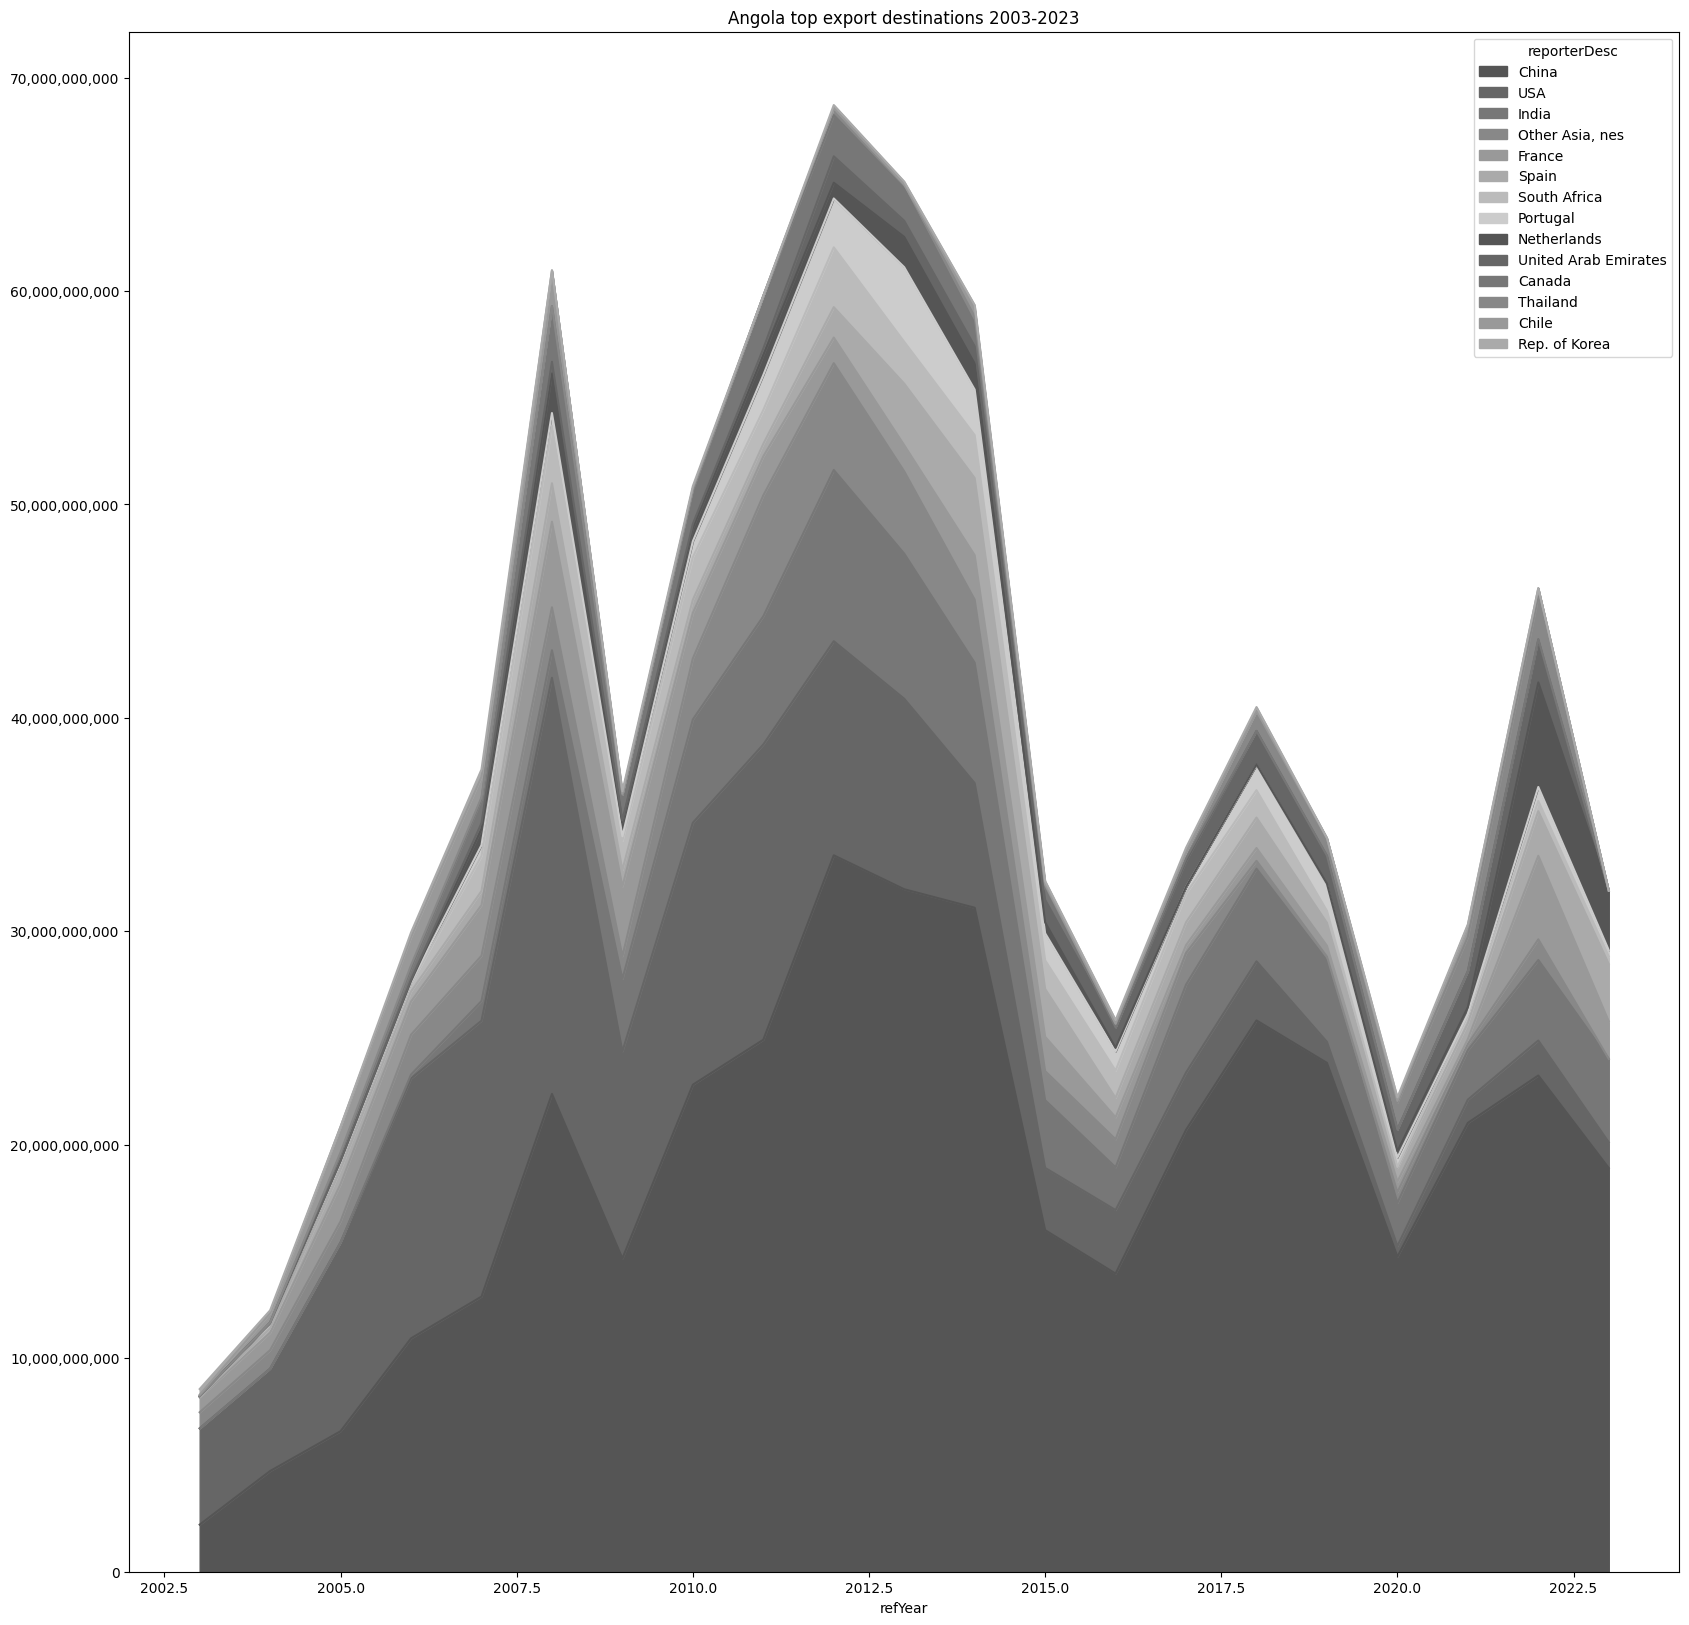

In [257]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plotfile = f"reports/{country_of_interest_name}_2.1.4_export_partners_{start_year}-{end_year}.png"
start_year=values_only.index.min()
end_year=values_only.index.max()
title=f"{country_of_interest_name} top export destinations {start_year}-{end_year}"
print("Plot saved to ", plotfile)
# see https://matplotlib.org/stable/gallery/color/named_colors.html
# colors = ['red','lightsalmon','green','lightgreen','darkviolet','violet','blue','dodgerblue','orange','yellow','brown','black','grey','pink','cyan','magenta',]
# colors = ['crimson', 'darkorange', 'gold', 'limegreen', 'mediumseagreen', 'teal', 'deepskyblue', 'royalblue', 'indigo', 'mediumvioletred', 'hotpink', 'saddlebrown', 'grey', 'black', 'darkslategrey', 'darkkhaki']
colors = [ '#555555', '#666666', '#777777', '#888888', '#999999', '#AAAAAA', '#BBBBBB', '#CCCCCC', ]

fig2 = values_only.plot.area(figsize=(20,20),title=title, color=colors)
for i, line in enumerate(fig2.get_lines()):
    n = i % len(colors)
    print(i, line, colors[n])
    line.set_color(colors[n])

formatter = ticker.StrMethodFormatter('{x:,.0f}')
fig2.yaxis.set_major_formatter(formatter)

plt.savefig(plotfile)
plt.show()

In [258]:
show_only_columns = [(l1, country) for l1,country in pivoted.columns.tolist() if country in top_export_partners]

#### Export to Excel

Table with the top export destinations for the period of interest

In [259]:
top_partners_file = f'reports/{country_of_interest_name}_2.1.1_top_export_partners.xlsx'
top_partners_cols_file = f'reports/{country_of_interest_name}_2.1.2_top_export_partners_cols.xlsx'
export_top_partners_file = f'reports/{country_of_interest_name}_2.1.3_export_top_{show_only_top}_partners_{start_year}-{end_year}.xlsx'

exports.to_excel(top_partners_file)
pivoted.to_excel(top_partners_cols_file)
pivoted[show_only_columns].to_excel(export_top_partners_file)

print(f"Top partners file: {top_partners_file}")
print(f"Top partners cols file: {top_partners_cols_file}")
print(f"Export top partners file: {export_top_partners_file}")

Top partners file: reports/Angola_2.1.1_top_export_partners.xlsx
Top partners cols file: reports/Angola_2.1.2_top_export_partners_cols.xlsx
Export top partners file: reports/Angola_2.1.3_export_top_5_partners_2003-2023.xlsx


### 2.2 Exports: products

#### What are the main exported products

In [261]:
import pandas as pd

# show 500 lines of dataframes
pd.set_option('display.max_rows', 500)

show_only_top=5
# years_of_interest = comtrade.year_range(2020, 2021)

print(country_of_interest_name, years_of_interest)

Angola 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023


Get the products exported by country of interest

In [262]:

# If symmetric_reporting is "True" we get the exports from
#    the reported imports of all the countries
# i.e. instead of asking Country of Interest for export data we ask the world
#    for import data from Country of Interest

symmetric_reporting = True  # set to false to use reported exports by Country of Interest

if symmetric_reporting:
    reporterCode = None
    partnerCode = country_of_interest
    flowCode = 'M'
    reporter_column = 'partner'
    partner_column = 'reporter'
else:
    reporterCode = country_of_interest
    partnerCode = None
    flowCode = 'X'
    reporter_column = 'reporter'
    partner_column = 'partner'



In [263]:
import comtradetools
import logging
# Set logging level to debug
logging.basicConfig(level=logging.DEBUG)



clCode = 'HS'
cmdDetail = 'AG6'  # AG2 aggregate two digits, top level, AG4 detail 4 digits, ... World Bank uses AG6
df = comtradetools.getFinalData(
                        APIKEY,
                        reporterCode=reporterCode,
                        typeCode='C',  # commodities
                        freqCode='A',  # annual
                        flowCode=flowCode,
                        period=years_of_interest,
                        partnerCode=partnerCode,
                        remove_world=False,
                        partner2Code=0,
                        clCode=clCode,
                        cmdCode=cmdDetail,
                        motCode=0,  # all means of transport
                        customsCode='C00',
                        includeDesc=True,
                        cache=True
                        )

INFO:root:Calling getFinalData for period 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
INFO:root:Using cached results for period 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
INFO:root:Calling getFinalData for period 2015,2016,2017,2018,2019,2020,2021,2022,2023
INFO:root:Using cached results for period 2015,2016,2017,2018,2019,2020,2021,2022,2023


In [264]:
print("Years available in the data:", list(df.refYear.unique()))

Years available in the data: [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


In [265]:
df.head()

,typeCode,freqCode,refPeriodId,refYear,refMonth,period,reporterCode,reporterISO,reporterDesc,flowCode,...,netWgt,isNetWgtEstimated,grossWgt,isGrossWgtEstimated,cifvalue,fobvalue,primaryValue,legacyEstimationFlag,isReported,isAggregate
0,C,A,20030101,2003,52,2003,120,CMR,Cameroon,M,...,"34,049.00",True,NaN,False,"11,589.00",NaN,"11,589.00",6,False,False
1,C,A,20030101,2003,52,2003,120,CMR,Cameroon,M,...,"67,041.00",False,NaN,False,"120,834.00",NaN,"120,834.00",0,False,False
2,C,A,20030101,2003,52,2003,120,CMR,Cameroon,M,...,"358,797.00",False,NaN,False,"109,590.00",NaN,"109,590.00",0,False,False
3,C,A,20030101,2003,52,2003,120,CMR,Cameroon,M,...,"3,128,350.00",False,NaN,False,"801,451.00",NaN,"801,451.00",0,False,False
4,C,A,20030101,2003,52,2003,120,CMR,Cameroon,M,...,"76,763.00",False,NaN,False,"23,194.00",NaN,"23,194.00",0,False,False


Agreggate by product, keep the top products exported each year

In [267]:
import pandas as pd
import comtradetools
# show 500 lines
pd.options.display.max_rows=500
pd.options.display.float_format='{:,.2f}'.format

show_only_top = 5
exports = comtradetools.total_rank_perc(df,['refYear','flowCode','cmdCode'],'primaryValue','product',drop_duplicates=True)
exports = exports[exports['product_rank']<=show_only_top]
exports.info()

cols=['refYear','flowCode','cmdCode','product_rank','product_sum','product_upper_perc', 'product_upper_sum', 'cmdDesc']
formats =  comtradetools.make_format(cols)

top_export_products_codes = exports['cmdCode'].unique()

print(f"Top products exported by {country_of_interest_name} in {years_of_interest}:\n {top_export_products_codes}")
for cmdCode in top_export_products_codes:
    print(f"   {cmdCode}: {comtradetools.HS_CODES.get(cmdCode,cmdCode)}")
exports[cols].sort_values(['refYear','flowCode','product_rank']).head(10).style.format(formats)


<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 7 to 67038
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   typeCode                  105 non-null    object 
 1   freqCode                  105 non-null    object 
 2   refPeriodId               105 non-null    int64  
 3   refYear                   105 non-null    int64  
 4   refMonth                  105 non-null    int64  
 5   period                    105 non-null    object 
 6   reporterCode              105 non-null    int64  
 7   reporterISO               105 non-null    object 
 8   reporterDesc              105 non-null    object 
 9   flowCode                  105 non-null    object 
 10  flowDesc                  105 non-null    object 
 11  partnerCode               105 non-null    int64  
 12  partnerISO                105 non-null    object 
 13  partnerDesc               105 non-null    object 
 14  partner2Code 

,refYear,flowCode,cmdCode,product_rank,product_sum,product_upper_perc,product_upper_sum,cmdDesc
7,2003,M,270900,1,"$8,804,250,597",94.455%,"$9,321,073,424","Oils; petroleum oils and oils obtained from bituminous minerals, crude"
26,2003,M,710231,2,"$277,225,900",2.974%,"$9,321,073,424","Diamonds; non-industrial, unworked or simply sawn, cleaved or bruted, but not mounted or set"
79,2003,M,271019,3,"$140,536,071",1.508%,"$9,321,073,424","Oils; petroleum oils and oils obtained from bituminous minerals, not crude; preparations n.e.c., containing by weight 70% or more of petroleum oils or oils obtained from bituminous minerals, (excluding waste oils), other than light oils and preparations"
468,2003,M,271011,4,"$16,672,610",0.179%,"$9,321,073,424","Petroleum oils and oils from bituminous minerals, not crude or waste oils; preparations n.e.c. with 70% or more (weight),of petroleum oils or oils from bituminous minerals; being the basic constituents of the preparations: light oils and preparations"
292,2003,M,730890,5,"$12,669,535",0.136%,"$9,321,073,424","Iron or steel; structures and parts thereof, n.e.s. in heading no. 7308"
1571,2004,M,270900,1,"$12,338,282,330",96.607%,"$12,771,576,748","Oils; petroleum oils and oils obtained from bituminous minerals, crude"
1835,2004,M,271019,2,"$168,682,119",1.321%,"$12,771,576,748","Oils; petroleum oils and oils obtained from bituminous minerals, not crude; preparations n.e.c., containing by weight 70% or more of petroleum oils or oils obtained from bituminous minerals, (excluding waste oils), other than light oils and preparations"
1506,2004,M,710231,3,"$136,904,563",1.072%,"$12,771,576,748","Diamonds; non-industrial, unworked or simply sawn, cleaved or bruted, but not mounted or set"
1639,2004,M,271011,4,"$24,641,587",0.193%,"$12,771,576,748","Petroleum oils and oils from bituminous minerals, not crude or waste oils; preparations n.e.c. with 70% or more (weight),of petroleum oils or oils from bituminous minerals; being the basic constituents of the preparations: light oils and preparations"
3018,2004,M,710239,5,"$13,829,634",0.108%,"$12,771,576,748","Diamonds; non-industrial, (other than unworked or simply sawn, cleaved or bruted), but not mounted or set"


#### Export to Excel

In [268]:
filename = f'reports/{country_of_interest_name}_2.2_exports_products_{clCode}-{cmdDetail}-{exports["refYear"].min()}-{exports["refYear"].max()}.xlsx'
print("Exporting to ",filename)
exports[cols].to_excel(filename,index=False)

Exporting to  reports/Angola_2.2_exports_products_HS-AG6-2003-2023.xlsx


### 2.3 Export partners / products analysis

Which are the partners buying the top exports of country of interest?


In [269]:

# If symmetric_reporting is "True" we get the exports from
#    the reported imports of all the countries
# i.e. instead of asking Country of Interest for export data we ask the world
#    for import data from Country of Interest

symmetric_reporting = True  # set to false to use reported exports by Country of Interest

if symmetric_reporting:
    reporterCode = None
    partnerCode = country_of_interest
    flowCode = 'M'
    reporter_column = 'partner'
    partner_column = 'reporter'
else:
    reporterCode = country_of_interest
    partnerCode = None
    flowCode = 'X'
    reporter_column = 'reporter'
    partner_column = 'partner'



In [270]:
import warnings
warnings.filterwarnings('default')

clCode = 'HS'
cmdDetail = 'AG6'  # not all countries report at higher detail

df = comtradetools.getFinalData(
                        APIKEY,
                        reporterCode=reporterCode,
                        typeCode='C',  # commodities
                        freqCode='A',  # annual
                        flowCode=flowCode,
                        period=years_of_interest,
                        period_size=1,
                        partnerCode=partnerCode,
                        remove_world=True,
                        partner2Code=0,
                        clCode=clCode,
                        cmdCode=cmdDetail,
                        motCode=0,  # all means of transport
                        customsCode='C00',
                        includeDesc=True,
                        cache=True
                        )
df.info()

INFO:root:Calling getFinalData for period 2003
INFO:root:Using cached results for period 2003
INFO:root:Calling getFinalData for period 2004
INFO:root:Using cached results for period 2004


INFO:root:Calling getFinalData for period 2005
INFO:root:Using cached results for period 2005
INFO:root:Calling getFinalData for period 2006
INFO:root:Using cached results for period 2006
INFO:root:Calling getFinalData for period 2007
INFO:root:Using cached results for period 2007
INFO:root:Calling getFinalData for period 2008
INFO:root:Using cached results for period 2008
INFO:root:Calling getFinalData for period 2009
INFO:root:Using cached results for period 2009
INFO:root:Calling getFinalData for period 2010
INFO:root:Using cached results for period 2010
INFO:root:Calling getFinalData for period 2011
INFO:root:Using cached results for period 2011
INFO:root:Calling getFinalData for period 2012
INFO:root:Using cached results for period 2012
INFO:root:Calling getFinalData for period 2013
INFO:root:Using cached results for period 2013
INFO:root:Calling getFinalData for period 2014
INFO:root:Using cached results for period 2014
INFO:root:Calling getFinalData for period 2015
INFO:root:Usi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70387 entries, 0 to 70386
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   typeCode                  70387 non-null  object 
 1   freqCode                  70387 non-null  object 
 2   refPeriodId               70387 non-null  int64  
 3   refYear                   70387 non-null  int64  
 4   refMonth                  70387 non-null  int64  
 5   period                    70387 non-null  object 
 6   reporterCode              70387 non-null  int64  
 7   reporterISO               70387 non-null  object 
 8   reporterDesc              70387 non-null  object 
 9   flowCode                  70387 non-null  object 
 10  flowDesc                  70387 non-null  object 
 11  partnerCode               70387 non-null  int64  
 12  partnerISO                70387 non-null  object 
 13  partnerDesc               70387 non-null  object 
 14  partne

In [271]:
cols=['refYear','flowCode','reporterDesc','partnerDesc','primaryValue','cmdCode','cmdDesc']
df[cols].sample(10)

,refYear,flowCode,reporterDesc,partnerDesc,primaryValue,cmdCode,cmdDesc
11915,2008,M,Venezuela,Angola,"52,747.00",901590,Surveying equipment; parts and accessories for articles of heading no. 9015
55266,2020,M,Namibia,Angola,12.15,040310,"Dairy produce; yoghurt, whether or not concentrated or containing added sugar or other sweetening matter or flavoured or containing added fruit or cocoa"
46875,2018,M,Mozambique,Angola,"10,979.20",330499,"Cosmetic and toilet preparations; n.e.c. in heading no. 3304, for the care of the skin (excluding medicaments, including sunscreen or sun tan preparations)"
69701,2023,M,South Africa,Angola,410.94,271012,"Petroleum oils and oils from bituminous minerals, not containing biodiesel, not crude, not waste oils; preparations n.e.c, containing by weight 70% or more of petroleum oils or oils from bituminou..."
833,2003,M,Netherlands,Angola,"41,855.00",848110,"Valves; pressure reducing, for pipes, boiler shells, tanks, vats or the like"
38235,2016,M,Portugal,Angola,132.76,940330,"Furniture; wooden, for office use"
33224,2015,M,India,Angola,"41,904.00",760110,"Aluminium; unwrought, (not alloyed)"
600,2003,M,Sao Tome and Principe,Angola,34.00,620422,"Ensembles; women's or girls', of cotton (not knitted or crocheted)"
64921,2022,M,Portugal,Angola,"320,892.35",680223,"Granite; articles thereof, simply cut or sawn, with a flat or even surface"
58895,2021,M,France,Angola,344.18,340399,"Lubricating preparations; other than for the treatment of textile and similar materials, not containing petroleum oils or oils obtained from bituminous minerals"


In [272]:
df.refYear.unique()

array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

Aggregate by partner and keep the main ones

In [290]:
import pandas as pd
import comtradetools
import warnings

# show 500 lines
pd.options.display.max_rows=500
pd.options.display.float_format='{:,.2f}'.format

show_only_top = 5
print(f"Top products exported by {country_of_interest_name} in {years_of_interest}:\n {top_export_products_codes}")
for cmdCode in top_export_products_codes:
    print(f"   {cmdCode}: {comtradetools.HS_CODES.get(cmdCode,cmdCode)}")

print(f"Top export partners ({len(top_export_partners)}): {top_export_partners}")
prefix='cmd_partner'
# remove world
if 0 in df[f'{partner_column}Code'].unique():
    warnings.warn("Removing world from data")
    df = df[df[f'{partner_column}Code']!=0]

products_and_partners = comtradetools.total_rank_perc(df,['refYear','flowCode','cmdCode',f'{partner_column}Code'],'primaryValue',prefix,drop_duplicates=True)

cols=['refYear','flowCode','cmdCode','cmdDesc',f'{partner_column}Desc',f'{prefix}_sum',f'{prefix}_rank',f'{prefix}_perc',f'{prefix}_upper_sum']
formats=comtradetools.make_format(cols)
products_and_partners=products_and_partners[(products_and_partners['cmdCode'].isin(top_export_products_codes)
                       & (products_and_partners[f'{prefix}_rank']<=show_only_top))]


Top products exported by Angola in 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023:
 ['270900' '710231' '271019' '730890' '271011' '710239' '271112' '999999'
 '890520' '271119' '890190' '271111' '271012' '271500']
   270900: Oils; petroleum oils and oils obtained from bituminous minerals, crude
   710231: Diamonds; non-industrial, unworked or simply sawn, cleaved or bruted, but not mounted or set
   271019: Petroleum oils and oils from bituminous minerals, not containing biodiesel, not crude, not waste oils; preparations n.e.c, containing by weight 70% or more of petroleum oils or oils from bituminous minerals; not light oils and preparations
   730890: Iron or steel; structures and parts thereof, n.e.c. in heading 7308
   271011: 271011
   710239: Diamonds; non-industrial, (other than unworked or simply sawn, cleaved or bruted), but not mounted or set
   271112: Petroleum gases and other gaseous hydrocarbons; liquefied, propane


#### Show partners for main export products

In [284]:
products_and_partners[cols].sort_values(['refYear','flowCode',f'{prefix}_upper_sum',f'{prefix}_rank'],
                                             ascending=[True,True,False,True])\
                                             .head(10).style.format(formats) #.hide(axis='index')

,refYear,flowCode,cmdDesc,cmdCode,reporterDesc,cmd_partner_sum,cmd_partner_rank,cmd_partner_perc,cmd_partner_upper_sum
1339,2003,M,"Oils; petroleum oils and oils obtained from bituminous minerals, crude",270900,USA,"$4,334,268,265",1,49.229%,"$8,804,250,597"
78,2003,M,"Oils; petroleum oils and oils obtained from bituminous minerals, crude",270900,China,"$2,205,654,993",2,25.052%,"$8,804,250,597"
465,2003,M,"Oils; petroleum oils and oils obtained from bituminous minerals, crude",270900,"Other Asia, nes","$754,792,400",3,8.573%,"$8,804,250,597"
123,2003,M,"Oils; petroleum oils and oils obtained from bituminous minerals, crude",270900,France,"$693,177,977",4,7.873%,"$8,804,250,597"
271,2003,M,"Oils; petroleum oils and oils obtained from bituminous minerals, crude",270900,Rep. of Korea,"$254,993,504",5,2.896%,"$8,804,250,597"
26,2003,M,"Diamonds; non-industrial, unworked or simply sawn, cleaved or bruted, but not mounted or set",710231,Belgium,"$256,473,845",1,92.514%,"$277,225,900"
1358,2003,M,"Diamonds; non-industrial, unworked or simply sawn, cleaved or bruted, but not mounted or set",710231,USA,"$20,640,087",2,7.445%,"$277,225,900"
1318,2003,M,"Diamonds; non-industrial, unworked or simply sawn, cleaved or bruted, but not mounted or set",710231,Thailand,"$64,571",3,0.023%,"$277,225,900"
92,2003,M,"Diamonds; non-industrial, unworked or simply sawn, cleaved or bruted, but not mounted or set",710231,China,"$47,397",4,0.017%,"$277,225,900"
1343,2003,M,"Oils; petroleum oils and oils obtained from bituminous minerals, not crude; preparations n.e.c., containing by weight 70% or more of petroleum oils or oils obtained from bituminous minerals, (excluding waste oils), other than light oils and preparations",271019,USA,"$140,522,378",1,99.990%,"$140,536,071"


#### Export to Excel

In [291]:
filename = f'reports/{country_of_interest_name}_2.3_exports_products_partners_{clCode}-{cmdDetail}-{products_and_partners["refYear"].min()}-{products_and_partners["refYear"].max()}.xlsx'
products_and_partners[cols].sort_values(['refYear','flowCode',f'{prefix}_upper_sum',f'{prefix}_rank'],
                                             ascending=[True,True,False,True]).to_excel(filename, index=False)
print("Exporting to ",filename)

Exporting to  reports/Angola_2.3_exports_products_partners_HS-AG6-2003-2023.xlsx


### 2.4 Main clients and products exported 

Detail of the main products by export partner.

Allows to analyse the mix of products of the main export partners from this country

In [292]:
top_export_partners

array(['China', 'France', 'Rep. of Korea', 'Other Asia, nes', 'USA',
       'Chile', 'South Africa', 'Canada', 'India', 'Portugal', 'Spain',
       'United Arab Emirates', 'Thailand', 'Netherlands'], dtype=object)

In [293]:
import comtradetools

show_only_top = 5

print(f"Top export partners ({len(top_export_partners)}): {top_export_partners}")
prefix='partner_cmd'
partners_and_products = comtradetools.total_rank_perc(df,['refYear','flowCode',f'{partner_column}Code','cmdCode'],'primaryValue',prefix,drop_duplicates=False)

cols=['refYear','flowCode',f'{partner_column}Desc','cmdCode','cmdDesc',f'{prefix}_rank',f'{prefix}_sum',f'{prefix}_perc',f'{prefix}_upper_sum']
formats = comtradetools.make_format(cols)
partners_and_products=partners_and_products[(partners_and_products[f'{partner_column}Desc'].isin(top_export_partners)
                       & (partners_and_products[f'{prefix}_rank']<=show_only_top))]

print("First rows")
partners_and_products[partners_and_products[f'{prefix}_rank']<=show_only_top][cols].sort_values(
    ['refYear','flowCode','partner_cmd_upper_sum',f'{prefix}_sum',f'{prefix}_rank'],
    ascending=[True,True,False,False,False]).head(10).style.format(formats).hide(axis='index')

Top export partners (14): ['China' 'France' 'Rep. of Korea' 'Other Asia, nes' 'USA' 'Chile'
 'South Africa' 'Canada' 'India' 'Portugal' 'Spain' 'United Arab Emirates'
 'Thailand' 'Netherlands']
First rows


refYear,flowCode,reporterDesc,cmdCode,cmdDesc,partner_cmd_rank,partner_cmd_sum,partner_cmd_perc,partner_cmd_upper_sum
2003,M,USA,270900,"Oils; petroleum oils and oils obtained from bituminous minerals, crude",1,"$4,334,268,265",96.127%,"$4,508,909,969"
2003,M,USA,271019,"Oils; petroleum oils and oils obtained from bituminous minerals, not crude; preparations n.e.c., containing by weight 70% or more of petroleum oils or oils obtained from bituminous minerals, (excluding waste oils), other than light oils and preparations",2,"$140,522,378",3.117%,"$4,508,909,969"
2003,M,USA,710231,"Diamonds; non-industrial, unworked or simply sawn, cleaved or bruted, but not mounted or set",3,"$20,640,087",0.458%,"$4,508,909,969"
2003,M,USA,271011,"Petroleum oils and oils from bituminous minerals, not crude or waste oils; preparations n.e.c. with 70% or more (weight),of petroleum oils or oils from bituminous minerals; being the basic constituents of the preparations: light oils and preparations",4,"$7,908,922",0.175%,"$4,508,909,969"
2003,M,USA,999999,Commodities not specified according to kind,5,"$4,929,591",0.109%,"$4,508,909,969"
2003,M,China,270900,"Oils; petroleum oils and oils obtained from bituminous minerals, crude",1,"$2,205,654,993",99.987%,"$2,205,934,880"
2003,M,China,251611,Granite; crude or roughly trimmed,2,"$232,059",0.011%,"$2,205,934,880"
2003,M,China,710231,"Diamonds; non-industrial, unworked or simply sawn, cleaved or bruted, but not mounted or set",3,"$47,397",0.002%,"$2,205,934,880"
2003,M,China,392690,Plastics; other articles n.e.s. in chapter 39,4,$257,0.000%,"$2,205,934,880"
2003,M,China,200410,"Vegetable preparations; potatoes, prepared or preserved otherwise than by vinegar or acetic acid, frozen",5,$119,0.000%,"$2,205,934,880"


Last rows

In [294]:
partners_and_products[partners_and_products[f'{prefix}_rank']<=show_only_top][cols].sort_values(
    ['refYear','flowCode','partner_cmd_upper_sum',f'{prefix}_sum',f'{prefix}_rank'],
    ascending=[True,True,False,False,False]).tail(10).style.format(formats).hide(axis='index')

refYear,flowCode,reporterDesc,cmdCode,cmdDesc,partner_cmd_rank,partner_cmd_sum,partner_cmd_perc,partner_cmd_upper_sum
2023,M,Portugal,251612,"Granite; merely cut, by sawing or otherwise, into blocks or slabs of a rectangular (including square) shape",4,"$3,875,262",1.323%,"$293,020,792"
2023,M,Portugal,230230,"Bran, sharps and other residues; of wheat, whether or not in the form of pellets, derived from the sifting, milling or other workings thereof",5,"$2,521,536",0.861%,"$293,020,792"
2023,M,Canada,440729,"Wood, tropical, n.e.c. in item no. 4407.2, sawn or chipped lengthwise, sliced or peeled, whether or not planed, sanded or finger-jointed, of a thickness exceeding 6mm",1,"$78,788",74.318%,"$106,015"
2023,M,Canada,710239,"Diamonds; non-industrial, (other than unworked or simply sawn, cleaved or bruted), but not mounted or set",2,"$10,499",9.904%,"$106,015"
2023,M,Canada,870880,Vehicle parts; suspension systems and parts thereof (including shock-absorbers),3,"$6,608",6.233%,"$106,015"
2023,M,Canada,030549,"Fish; smoked, whether or not cooked before or during smoking, n.e.c. in item no. 0305.4, includes fillets, but excludes edible fish offal",4,"$3,219",3.036%,"$106,015"
2023,M,Canada,970191,"Paintings, drawings and pastels; executed entirely by hand, other than drawings of heading no. 4906, of an age not exceeding 100 years",5,"$2,659",2.508%,"$106,015"
2023,M,Chile,870899,Vehicle parts and accessories; n.e.c. in heading no. 8708,1,"$1,604",57.873%,"$2,772"
2023,M,Chile,870892,Vehicle parts; silencers (mufflers) and exhaust pipes; parts thereof,2,$958,34.541%,"$2,772"
2023,M,Chile,391990,"Plastics; plates, sheets, film, foil, tape, strip, other flat shapes thereof, self-adhesive, other than in rolls of a width not exceeding 20cm",3,$210,7.586%,"$2,772"


#### Export to Excel

In [295]:
filename = f'reports/{country_of_interest_name}_2.4_exports_partners_products_{clCode}-{cmdDetail}-{partners_and_products["refYear"].min()}-{partners_and_products["refYear"].max()}.xlsx'
partners_and_products[partners_and_products[f'{prefix}_rank']<=show_only_top][cols].sort_values(
    ['refYear','flowCode','partner_cmd_upper_sum',f'{prefix}_sum',f'{prefix}_rank'],
    ascending=[True,True,False,False,False]).to_excel(filename, index=False)
print("Exporting to ",filename)

Exporting to  reports/Angola_2.4_exports_partners_products_HS-AG6-2003-2023.xlsx


### 2.5 Alternative suppliers of costumers of country of interest




For each year, partner, exported commodity, fetches all the imports of
the commodity by partner from other countries, and computes the ranking
of country of interest among the suppliers of partner for that commodity,
e.g.

Country of interest：Angola, in 2021, China, exported commodity code 270900 "Oils; petroleum oils and oils obtained 
from bituminous minerals, crude" ; fetch all suppliers of 270900 of China and compute
the ranking of Angola.


First step is to get the combos of partner and commodity

In [296]:
combos_of_interest = partners_and_products[(partners_and_products['cmdCode'].isin(top_export_products_codes)
                & (partners_and_products[f'{partner_column}Code'].isin(top_export_partners_codes)))][[f'{partner_column}Code','cmdCode']].drop_duplicates()
combos_of_interest = [tuple(x) for x in combos_of_interest.values]
len(combos_of_interest)

73

In [297]:
# create lists of commodities codes and country codes to query comtrade
cmdCode_list = [cmdCode for (countryCode,cmdCode) in combos_of_interest]
cmdCode_list = list(set(cmdCode_list))
countryCode_list = [countryCode for (countryCode,cmdCode) in combos_of_interest]
countryCode_list = list(set(countryCode_list))
cmdCodeCSV = ','.join(cmdCode_list)
countryCodeCSV = ','.join(map(str,countryCode_list))

Get all the suppliers of client for products exported by contry of interest.

In [298]:
print("Years of interest: ", years_of_interest)
print("countryCodeCSV: ", countryCodeCSV)
print("cmdCodeCSV: ", cmdCodeCSV)

df = comtradetools.getFinalData(APIKEY,
                                typeCode='C',  # commodities
                                freqCode='A',  # annual
                                flowCode='M',
                                reporterCode=countryCodeCSV,
                                partnerCode=None,
                                remove_world=True,
                                partner2Code=0,
                                period=years_of_interest,
                                period_size=1,
                                clCode=clCode,
                                cmdCode=cmdCodeCSV,  # Top level product types
                                motCode=0,  # all means of transport
                                customsCode='C00',
                                includeDesc=True,
                                cache=True,

                                )

INFO:root:Calling getFinalData for period 2003
INFO:root:Using cached results for period 2003
INFO:root:Calling getFinalData for period 2004
INFO:root:Using cached results for period 2004
INFO:root:Calling getFinalData for period 2005
INFO:root:Using cached results for period 2005
INFO:root:Calling getFinalData for period 2006
INFO:root:Using cached results for period 2006
INFO:root:Calling getFinalData for period 2007
INFO:root:Using cached results for period 2007
INFO:root:Calling getFinalData for period 2008
INFO:root:Using cached results for period 2008
INFO:root:Calling getFinalData for period 2009
INFO:root:Using cached results for period 2009
INFO:root:Calling getFinalData for period 2010
INFO:root:Using cached results for period 2010
INFO:root:Calling getFinalData for period 2011
INFO:root:Using cached results for period 2011
INFO:root:Calling getFinalData for period 2012
INFO:root:Using cached results for period 2012
INFO:root:Calling getFinalData for period 2013
INFO:root:Usi

Years of interest:  2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
countryCodeCSV:  764,710,490,842,620,528,124,784,724,152,410,251,156,699
cmdCodeCSV:  271119,270900,271012,999999,271112,271111,271011,271500,710239,710231,890190,271019,730890


INFO:root:Calling getFinalData for period 2014
INFO:root:Using cached results for period 2014
INFO:root:Calling getFinalData for period 2015
INFO:root:Using cached results for period 2015
INFO:root:Calling getFinalData for period 2016
INFO:root:Using cached results for period 2016
INFO:root:Calling getFinalData for period 2017
INFO:root:Using cached results for period 2017
INFO:root:Calling getFinalData for period 2018
INFO:root:Using cached results for period 2018
INFO:root:Calling getFinalData for period 2019
INFO:root:Using cached results for period 2019
INFO:root:Calling getFinalData for period 2020
INFO:root:Using cached results for period 2020
INFO:root:Calling getFinalData for period 2021
INFO:root:Using cached results for period 2021
INFO:root:Calling getFinalData for period 2022
INFO:root:Using cached results for period 2022
INFO:root:Calling getFinalData for period 2023
INFO:root:Using cached results for period 2023


Alternative, concatenating

In [299]:
import pandas as pd

try_alternative = False

if try_alternative:
    df2: pd.DataFrame = None
    for countryCode,cmdCode in combos_of_interest:
        print(countryCode,cmdCode)
        tmp = comtradetools.getFinalData(APIKEY,
                                        reporterCode=countryCode,
                                        typeCode='C',  # commodities
                                        freqCode='A',  # annual
                                        flowCode='M',
                                        partnerCode=None,
                                        remove_world=True,
                                        partner2Code=0,
                                        period=years_of_interest,
                                        period_size=6,
                                        clCode='HS',
                                        cmdCode=cmdCode,  # Top level product types
                                        customsCode='C00',
                                        motCode=0,  # all means of transport
                                        )
        if df2 is None:
            df2 = tmp
        else:
            df2 = pd.concat([df2,tmp],axis=0)


Partners buying top products of country of interest.

In [300]:
list(df.reporterDesc.unique()), list(df.partnerDesc.unique())


(['Canada',
  'China',
  'Chile',
  'France',
  'Rep. of Korea',
  'Portugal',
  'Netherlands',
  'Other Asia, nes',
  'South Africa',
  'India',
  'Spain',
  'Thailand',
  'United Arab Emirates',
  'USA'],
 ['Afghanistan',
  'Albania',
  'Algeria',
  'Azerbaijan',
  'Andorra',
  'Angola',
  'Argentina',
  'Australia',
  'Austria',
  'Bahamas',
  'Bangladesh',
  'Barbados',
  'Bermuda',
  'Belgium',
  'Bolivia (Plurinational State of)',
  'Bosnia Herzegovina',
  'Botswana',
  'Belize',
  'Brazil',
  'Brunei Darussalam',
  'Bulgaria',
  'Myanmar',
  'Belarus',
  'Cambodia',
  'Canada',
  'Cayman Isds',
  'Sri Lanka',
  'Chile',
  'Colombia',
  'Congo',
  'Dem. Rep. of the Congo',
  'Costa Rica',
  'Croatia',
  'Cuba',
  'Cyprus',
  'Czechia',
  'Denmark',
  'Dominica',
  'Dominican Rep.',
  'Ecuador',
  'El Salvador',
  'Ethiopia',
  'Estonia',
  'Fiji',
  'Finland',
  'Gabon',
  'French Polynesia',
  'Georgia',
  'Ghana',
  'Greece',
  'Guam',
  'Grenada',
  'Guatemala',
  'Haiti',
  '

For each partner show the top supliers of the products bought from country of interest. 

If country of interest is not in the top five, show position anyway if it is a supplier in the given year 

In [306]:
import pandas as pd
import comtradetools

#  set max rows to 500
pd.set_option('display.max_rows', 1500)


other_suppliers = comtradetools.total_rank_perc(
                                        df,
                                        groupby=['refYear','flowCode','reporterCode','cmdCode','partnerCode'],
                                        col='primaryValue',
                                        prefix='cmd_partner',
                                        )

other_suppliers = other_suppliers[other_suppliers[['reporterCode','cmdCode']].apply(tuple,axis=1).isin(combos_of_interest)]
cols=['reporterDesc','flowCode','refYear','cmdCode','cmdDesc','cmd_partner_rank','partnerDesc','primaryValue','cmd_partner_perc','cmd_partner_upper_sum']
formats =  comtradetools.make_format(cols)

other_suppliers[(other_suppliers['partnerCode'] == country_of_interest)
                | (other_suppliers['cmd_partner_rank']<=show_only_top)
                ][cols].sort_values(by=['reporterDesc','cmdCode','refYear','cmd_partner_rank']).head(20).style.format(formats).hide(axis="index")

reporterDesc,flowCode,refYear,cmdCode,cmdDesc,cmd_partner_rank,partnerDesc,primaryValue,cmd_partner_perc,cmd_partner_upper_sum
Canada,M,2003,270900,"Oils; petroleum oils and oils obtained from bituminous minerals, crude",1,Norway,"$2,772,038,190",28.065%,"$9,877,194,452"
Canada,M,2003,270900,"Oils; petroleum oils and oils obtained from bituminous minerals, crude",2,United Kingdom,"$1,900,125,321",19.238%,"$9,877,194,452"
Canada,M,2003,270900,"Oils; petroleum oils and oils obtained from bituminous minerals, crude",3,Algeria,"$1,680,173,461",17.011%,"$9,877,194,452"
Canada,M,2003,270900,"Oils; petroleum oils and oils obtained from bituminous minerals, crude",4,Iraq,"$805,429,136",8.154%,"$9,877,194,452"
Canada,M,2003,270900,"Oils; petroleum oils and oils obtained from bituminous minerals, crude",5,Saudi Arabia,"$574,808,092",5.820%,"$9,877,194,452"
Canada,M,2004,270900,"Oils; petroleum oils and oils obtained from bituminous minerals, crude",1,Norway,"$3,574,664,455",28.918%,"$12,361,243,820"
Canada,M,2004,270900,"Oils; petroleum oils and oils obtained from bituminous minerals, crude",2,Algeria,"$2,378,849,061",19.244%,"$12,361,243,820"
Canada,M,2004,270900,"Oils; petroleum oils and oils obtained from bituminous minerals, crude",3,United Kingdom,"$2,135,192,802",17.273%,"$12,361,243,820"
Canada,M,2004,270900,"Oils; petroleum oils and oils obtained from bituminous minerals, crude",4,Saudi Arabia,"$859,137,600",6.950%,"$12,361,243,820"
Canada,M,2004,270900,"Oils; petroleum oils and oils obtained from bituminous minerals, crude",5,Iraq,"$847,703,131",6.858%,"$12,361,243,820"


### Ranking of country of interest in the supliers of main export products

Allows assessment of the importance of country of interest for the partners
that are buying its main exports.

In [307]:
ignore_if_rank_is_higher = 25

relevant_for_partner_imports=other_suppliers[
    (other_suppliers['partnerCode'
                     ] == country_of_interest) &
    (other_suppliers['cmd_partner_rank'] < ignore_if_rank_is_higher)

                     ][cols].sort_values(by=['reporterDesc','cmdCode','refYear','cmd_partner_rank'])
relevant_for_partner_imports.head(50).style.format(formats).hide(axis='index')

reporterDesc,flowCode,refYear,cmdCode,cmdDesc,cmd_partner_rank,partnerDesc,primaryValue,cmd_partner_perc,cmd_partner_upper_sum
Canada,M,2005,270900,"Oils; petroleum oils and oils obtained from bituminous minerals, crude",12,Angola,"$274,446,268",1.517%,"$18,090,860,235"
Canada,M,2006,270900,"Oils; petroleum oils and oils obtained from bituminous minerals, crude",11,Angola,"$533,428,794",2.588%,"$20,609,292,977"
Canada,M,2007,270900,"Oils; petroleum oils and oils obtained from bituminous minerals, crude",6,Angola,"$1,117,722,656",4.959%,"$22,538,781,351"
Canada,M,2008,270900,"Oils; petroleum oils and oils obtained from bituminous minerals, crude",4,Angola,"$2,607,160,823",8.152%,"$31,982,421,236"
Canada,M,2009,270900,"Oils; petroleum oils and oils obtained from bituminous minerals, crude",7,Angola,"$1,206,904,802",6.523%,"$18,503,685,618"
Canada,M,2010,270900,"Oils; petroleum oils and oils obtained from bituminous minerals, crude",8,Angola,"$1,574,222,990",6.820%,"$23,082,122,622"
Canada,M,2011,270900,"Oils; petroleum oils and oils obtained from bituminous minerals, crude",6,Angola,"$2,469,326,199",8.567%,"$28,824,422,617"
Canada,M,2012,270900,"Oils; petroleum oils and oils obtained from bituminous minerals, crude",8,Angola,"$1,930,372,689",6.480%,"$29,788,759,667"
Canada,M,2013,270900,"Oils; petroleum oils and oils obtained from bituminous minerals, crude",7,Angola,"$1,507,165,700",5.744%,"$26,237,946,570"
Canada,M,2014,270900,"Oils; petroleum oils and oils obtained from bituminous minerals, crude",6,Angola,"$1,065,876,478",4.954%,"$21,513,345,469"


In [309]:
filename = f'reports/{country_of_interest_name}_2.5.1_export_partners_alternative.xlsx'
print("Exporting to ",filename)
other_suppliers[cols].sort_values(by=['reporterDesc','cmdCode','refYear','cmd_partner_rank']).to_excel(filename)

Exporting to  reports/Angola_2.5.1_export_partners_alternative.xlsx


In [308]:
filename = f'reports/{country_of_interest_name}_2.5.2_export_partners_alternative_relevant.xlsx'
print("Exporting to ",filename)
relevant_for_partner_imports.to_excel(filename)

Exporting to  reports/Angola_2.5.2_export_partners_alternative_relevant.xlsx


## 3. Imports

In [310]:
print(country_of_interest_name, years_of_interest)

Angola 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023


### 3.1 Main import partners

Collect imports to country of interest.

Use either reported imports by country of interest, 
or reported exports to country of interest by
all other countries (symmetric reporting). 

Set variable `symmetric_reporting` to choose.

In [311]:
# If symmetric_reporting is "True" we get the imports from
#    the reported exports of all the countries
# i.e. instead of asking Country of Interest for import data we ask the world
#    for export data towards Country of Interest

symmetric_reporting = False  # set to false to use reported imports by Country of Interest

if symmetric_reporting:
    reporterCode = None
    partnerCode = country_of_interest
    flowCode = 'X'
    reporter_column = 'partner'
    partner_column = 'reporter'
else:
    reporterCode = country_of_interest
    partnerCode = None
    flowCode = 'M'
    reporter_column = 'reporter'
    partner_column = 'partner'



In [312]:
clCode = 'HS'
cmdDetail = 'AG6'  # AG2 aggregate two digits, top level, AG4 detail 4 digits, ... World bank uses AG6, but some codes AG4
df = comtradetools.getFinalData(
                        APIKEY,
                        reporterCode=reporterCode,
                        typeCode='C',  # commodities
                        freqCode='A',  # annual
                        flowCode=flowCode,  # imports
                        partnerCode=partnerCode, # every body
                        remove_world=True,
                        partner2Code=0, # ignore parter2
                        period=years_of_interest,
                        period_size=1,
                        clCode="HS",
                        cmdCode="TOTAL",
                        motCode=0,  # all means of transport
                        customsCode='C00',
                        includeDesc=True,
                        cache=True
                        )

INFO:root:Calling getFinalData for period 2003
INFO:root:Using cached results for period 2003
INFO:root:Empty result in cached result, retrying. Disable with retry_if_empty=False
/Users/jrc/develop/cipf-comtrade/venv/lib/python3.10/site-packages/comtradeapicall/PreviewGet.py:137: ResourceWarning: unclosed <ssl.SSLSocket fd=89, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('192.168.101.29', 53603), raddr=('20.101.83.117', 443)>
  return getPreviewData(subscription_key, 'FINAL', typeCode, freqCode, clCode, period, reporterCode,
INFO:root:Calling getFinalData for period 2004
INFO:root:Using cached results for period 2004
INFO:root:Empty result in cached result, retrying. Disable with retry_if_empty=False
/Users/jrc/develop/cipf-comtrade/venv/lib/python3.10/site-packages/comtradeapicall/PreviewGet.py:137: ResourceWarning: unclosed <ssl.SSLSocket fd=89, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('192.168.101.29', 53618), raddr=('2

Compute percentage of trade and rank of partners for each year.

Use `show_only_top` to show only the top partners (e.g. 5).

In [319]:
import pandas as pd
import comtradetools
# show 500 lines
pd.options.display.max_rows=500
pd.options.display.float_format='{:,.2f}'.format

show_only_top = 5
partner_column = 'partner'
reporter_column = 'reporter'

# aggregate by year, flow, reporter
imports = comtradetools.total_rank_perc(df,groupby=['refYear','flowCode',f'{partner_column}Desc'],
                                    col='primaryValue',
                                    prefix='partner',
                                    drop_duplicates=True)

cols=['refYear','flowCode','partner_rank',f'{partner_column}Desc','partner_sum','partner_perc','partner_upper_perc']

formats =  comtradetools.make_format(cols)

top_import_partners = imports[imports['partner_rank']<=show_only_top][f'{partner_column}Desc'].unique()
top_import_partners_codes = imports[imports['partner_rank']<=show_only_top][f'{partner_column}Code'].unique()

print(f"Top {show_only_top} import partners of {country_of_interest_name} in {years_of_interest}: \n{top_import_partners}")
imports[imports['partner_rank']<=show_only_top][cols].sort_values(['refYear','flowCode','partner_rank']).style.format(formats)

Top 5 import partners of Angola in 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023: 
['China' "Dem. People's Rep. of Korea" 'Portugal' 'USA' 'Areas, nes'
 'Brazil' 'South Africa' 'Netherlands' 'Rep. of Korea' 'Singapore'
 'Belgium' 'Togo' 'France' 'India']


,refYear,flowCode,partner_rank,partnerDesc,partner_sum,partner_perc,partner_upper_perc
165,2007,M,1,Portugal,"$1,641,640,086",14.796%,14.796%
108,2007,M,2,Dem. People's Rep. of Korea,"$1,051,122,766",9.474%,9.474%
219,2007,M,3,USA,"$995,114,611",8.969%,8.969%
228,2007,M,4,"Areas, nes","$958,097,638",8.636%,8.636%
43,2007,M,5,China,"$864,709,131",7.794%,7.794%
373,2009,M,1,Portugal,"$3,704,037,715",15.486%,15.486%
268,2009,M,2,China,"$2,094,782,750",8.758%,8.758%
414,2009,M,3,USA,"$1,947,700,684",8.143%,8.143%
253,2009,M,4,Brazil,"$1,587,724,279",6.638%,6.638%
393,2009,M,5,South Africa,"$1,465,902,027",6.129%,6.129%


Pivot the countries to columns, keeping the total value and percentage in separate columns.

----

Passamos os países para colunas, mantendo a percentagem e o valor em separado.

In [320]:
pivoted = df.pivot_table(index=['refYear','flowDesc'], columns=f'{partner_column}Desc', values=['primaryValue','partner_perc'])
pivoted.swaplevel(axis=1).fillna(0,inplace=True)
pivoted.sort_index(axis=1, level=0, inplace=True)
pivoted.fillna(0, inplace=True)
pivoted

partner_perc                                                \
partnerDesc       Afghanistan Albania Algeria American Samoa Andorra Angola   
refYear flowDesc                                                              
2007    Import           0.00    0.00    0.00           0.00    0.00   0.00   
2009    Import           0.00    0.00    0.00           0.00    0.00   0.00   
2010    Import           0.00    0.00    0.00           0.00    0.00   0.00   
2011    Import           0.00    0.00    0.00           0.00    0.00   0.00   
2012    Import           0.00    0.00    0.00           0.00    0.00   0.00   
2013    Import           0.00    0.00    0.00           0.00    0.00   0.00   
2014    Import           0.00    0.00    0.00           0.00    0.00   0.00   
2015    Import           0.00    0.00    0.00           0.00    0.00   0.00   
2016    Import           0.00    0.00    0.00           0.00    0.00   0.00   
2017    Import           0.00    0.00    0.00           0.00    0.00   0.00   
2018    Import           0.00    0.00    0.00           0.00    0.00   0.00   
2019    Import           0.00    0.00    0.00           0.00    0.00   0.00   
2020    Import           0.00    0.00    0.00           0.00    0.00   0.00   
2021    Import           0.00    0.00    0.00           0.00    0.00   0.00   
2022    Import           0.00    0.00    0.00           0.00    0.00   0.00   

                                                                     ...  \
partnerDesc      Anguilla Antarctica Antigua and Barbuda Areas, nes  ...   
refYear flowDesc                                                     ...   
2007    Import       0.00       0.00                0.00       0.09  ...   
2009    Import       0.00       0.00                0.00       0.00  ...   
2010    Import       0.00       0.00                0.00       0.00  ...   
2011    Import       0.00       0.00                0.00       0.00  ...   
2012    Import       0.00       0.00                0.00       0.00  ...   
2013    Import       0.00       0.00                0.00       0.00  ...   
2014    Import       0.00       0.00                0.00       0.00  ...   
2015    Import       0.00       0.00                0.00       0.00  ...   
2016    Import       0.00       0.00                0.00       0.00  ...   
2017    Import       0.00       0.00                0.00       0.00  ...   
2018    Import       0.00       0.00                0.00       0.00  ...   
2019    Import       0.00       0.00                0.00       0.00  ...   
2020    Import       0.00       0.00                0.00       0.00  ...   
2021    Import       0.00       0.00                0.00       0.00  ...   
2022    Import       0.00       0.00                0.00       0.00  ...   

                  primaryValue                                       \
partnerDesc            Uruguay Uzbekistan      Vanuatu    Venezuela   
refYear flowDesc                                                      
2007    Import   19,243,877.00  15,260.00    15,260.00   162,445.00   
2009    Import   12,023,947.00   1,432.00   225,760.00   342,849.00   
2010    Import   11,722,898.00       0.00         0.00    61,251.00   
2011    Import   13,351,093.00       0.00         0.00   144,495.00   
2012    Import   38,621,863.00  62,719.00         0.00   137,930.00   
2013    Import   25,980,751.00       0.00         0.00    71,647.00   
2014    Import   20,165,145.00       0.00         0.00   130,835.00   
2015    Import    7,498,894.53       0.00         0.00     5,050.04   
2016    Import    3,521,792.85       0.00 1,449,913.29   388,461.42   
2017    Import    4,716,321.41       0.00         0.00 5,966,464.75   
2018    Import   17,434,600.81      33.26         0.00   163,309.61   
2019    Import    6,478,609.20   1,843.88     8,526.07 3,014,394.65   
2020    Import   21,915,058.23     218.56         0.00 2,663,118.41   
2021    Import    1,399,442.47 226,071.61    57,168.89    21,224.14   
2022    Import    

Limit table to top_export_partners

Note that the number of top partners considered was set before with `show_only_top` (e.g. 5).

But each year the top partners may vary, so that the total number of partners for the period will be
more than `show_only_top`.

In [321]:
show_only_columns = [(l1, country) for l1,country in pivoted.columns.tolist() if country in top_import_partners]
pivoted[show_only_columns]

partner_perc                       \
partnerDesc        Areas, nes Belgium Brazil China   
refYear flowDesc                                     
2007    Import           0.09    0.04   0.06  0.08   
2009    Import           0.00    0.04   0.07  0.09   
2010    Import           0.00    0.04   0.05  0.10   
2011    Import           0.00    0.03   0.05  0.09   
2012    Import           0.00    0.04   0.05  0.12   
2013    Import           0.00    0.03   0.04  0.10   
2014    Import           0.00    0.04   0.05  0.12   
2015    Import           0.00    0.04   0.04  0.15   
2016    Import           0.00    0.04   0.05  0.12   
2017    Import           0.00    0.04   0.06  0.14   
2018    Import           0.00    0.07   0.05  0.15   
2019    Import           0.00    0.07   0.04  0.15   
2020    Import           0.00    0.04   0.06  0.15   
2021    Import           0.00    0.03   0.05  0.15   
2022    Import           0.00    0.05   0.04  0.16   

                                                                       \
partnerDesc      Dem. People's Rep. of Korea France India Netherlands   
refYear flowDesc                                                        
2007    Import                          0.09   0.04  0.01        0.01   
2009    Import                          0.00   0.03  0.05        0.05   
2010    Import                          0.00   0.05  0.03        0.11   
2011    Import                          0.00   0.04  0.02        0.09   
2012    Import                          0.00   0.04  0.03        0.02   
2013    Import                          0.00   0.03  0.02        0.03   
2014    Import                          0.00   0.04  0.02        0.02   
2015    Import                          0.00   0.03  0.02        0.02   
2016    Import                          0.00   0.03  0.02        0.02   
2017    Import                          0.00   0.03  0.03        0.02   
2018    Import                          0.00   0.03  0.03        0.01   
2019    Import                          0.00   0.13  0.03        0.01   
2020    Import                          0.00   0.03  0.05        0.01   
2021    Import                          0.00   0.04  0.07        0.04   
2022    Import                          0.00   0.02  0.06        0.07   

                                         ...                primaryValue  \
partnerDesc      Portugal Rep. of Korea  ... Dem. People's Rep. of Korea   
refYear flowDesc                         ...                               
2007    Import       0.15          0.01  ...            1,051,122,766.00   
2009    Import       0.15          0.02  ...                1,780,955.00   
2010    Import       0.14          0.01  ...               16,776,134.00   
2011    Import       0.17          0.11  ...                1,297,461.00   
2012    Import       0.19          0.02  ...                4,647,583.00   
2013    Import       0.16          0.16  ...                1,865,344.00   
2014    Import       0.17          0.02  ...                5,446,928.00   
2015    Import       0.13          0.03  ...               44,078,505.54   
2016    Import       0.13          0.03  ...                2,623,377.10   
2017    Import       0.17          0.02  ...               22,911,479.23   
2018    Import       0.14          0.02  ...                3,128,419.80   
2019    Import       0.13          0.05  ...               14,150,699.43   
2020    Import       0.14          0.03  ...                2,428,705.36   
2021    Import       0.12          0.02  ...                1,648,905.56   
2022    Import       0.11          0.09  ...                3,530,526.04   

                                                                     \
partnerDesc                France            India      Netherlands   
refYear flowDesc                                                      
2007    Import     428,509,154.00   146,755,323.00   156,598,435.00   
2009    Import     686,740,225.00 1,171,807,310.00 1,260,263,169.00   
2010 

Make a table with the total value of import from top partners in the period of interest

In [322]:
print("Top partners for import: ",top_import_partners)
print("Period of interest:",years_of_interest)

Top partners for import:  ['China' "Dem. People's Rep. of Korea" 'Portugal' 'USA' 'Areas, nes'
 'Brazil' 'South Africa' 'Netherlands' 'Rep. of Korea' 'Singapore'
 'Belgium' 'Togo' 'France' 'India']
Period of interest: 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023


In [323]:
import pandas as pd

# lets get just the value of imports from the top export partners
values_only = pivoted.loc[:,"primaryValue"]
values_only.reset_index(level=1, drop=True, inplace=True)
show_only_columns = [country for country in values_only.columns.tolist() if country in top_import_partners]
values_only=values_only[show_only_columns]
# sort columns by mean value
mean_values = values_only.mean().sort_values(ascending=False)
values_only = values_only[mean_values.index]
values_only

partnerDesc,Portugal,China,USA,Brazil,Rep. of Korea,South Africa,Singapore,Belgium,France,Netherlands,India,Togo,Dem. People's Rep. of Korea,"Areas, nes"
refYear,,,,,,,,,,,,,,
2007,"1,641,640,086.00","864,709,131.00","995,114,611.00","670,797,879.00","131,912,828.00","557,340,948.00","66,634,727.00","445,866,237.00","428,509,154.00","156,598,435.00","146,755,323.00","20,254,719.00","1,051,122,766.00","958,097,638.00"
2009,"3,704,037,715.00","2,094,782,750.00","1,947,700,684.00","1,587,724,279.00","444,453,753.00","1,465,902,027.00","192,191,793.00","900,148,143.00","686,740,225.00","1,260,263,169.00","1,171,807,310.00","49,185,726.00","1,780,955.00","28,335,855.00"
2010,"2,607,038,140.00","1,829,198,708.00","1,679,331,344.00","963,915,131.00","201,097,941.00","843,147,039.00","136,351,315.00","812,816,037.00","887,017,586.00","2,050,638,945.00","533,470,722.00","36,634,042.00","16,776,134.00","12,221,703.00"
2011,"3,455,494,969.00","1,837,128,963.00","1,747,664,018.00","939,992,479.00","2,349,725,667.00","987,867,818.00","354,506,804.00","633,415,232.00","855,179,886.00","1,816,622,261.00","340,990,172.00","35,376,682.00","1,297,461.00","609,705.00"
2012,"5,378,237,289.00","3,457,048,494.00","2,416,207,234.00","1,504,223,663.00","543,132,607.00","1,535,782,348.00","2,212,481,628.00","1,063,456,547.00","1,090,928,236.00","609,718,935.00","721,158,376.00","446,205.00","4,647,583.00","352,515.00"
2013,"4,339,196,450.00","2,807,559,763.00","1,678,238,536.00","1,185,093,950.00","4,239,548,971.00","1,198,043,342.00","1,402,073,500.00","831,660,513.00","712,450,729.00","721,968,940.00","464,625,959.00","5,591,165.00","1,865,344.00","147,193.00"
2014,"4,781,920,802.00","3,428,512,382.00","2,293,681,442.00","1,563,690,066.00","571,951,003.00","1,296,033,624.00","2,515,380,861.00","1,011,226,934.00","1,027,323,408.00","475,615,616.00","635,953,408.00","19,061,672.00","5,446,928.00","492,580.00"
2015,"2,783,117,807.23","3,311,091,334.27","1,720,304,160.25","874,844,000.65","721,535,063.60","1,007,873,691.42","2,092,488,997.18","836,612,948.45","707,316,898.24","338,419,286.55","430,719,483.58","232,903,417.81","44,078,505.54","255,128.21"
2016,"1,902,467,438.06","1,674,919,663.10","1,698,553,246.44","668,479,595.26","425,751,449.14","678,586,059.61","523,593,020.12","608,878,658.34","456,830,241.30","223,673,242.28","326,782,250.15","77,583,740.59","2,623,377.10",0.00


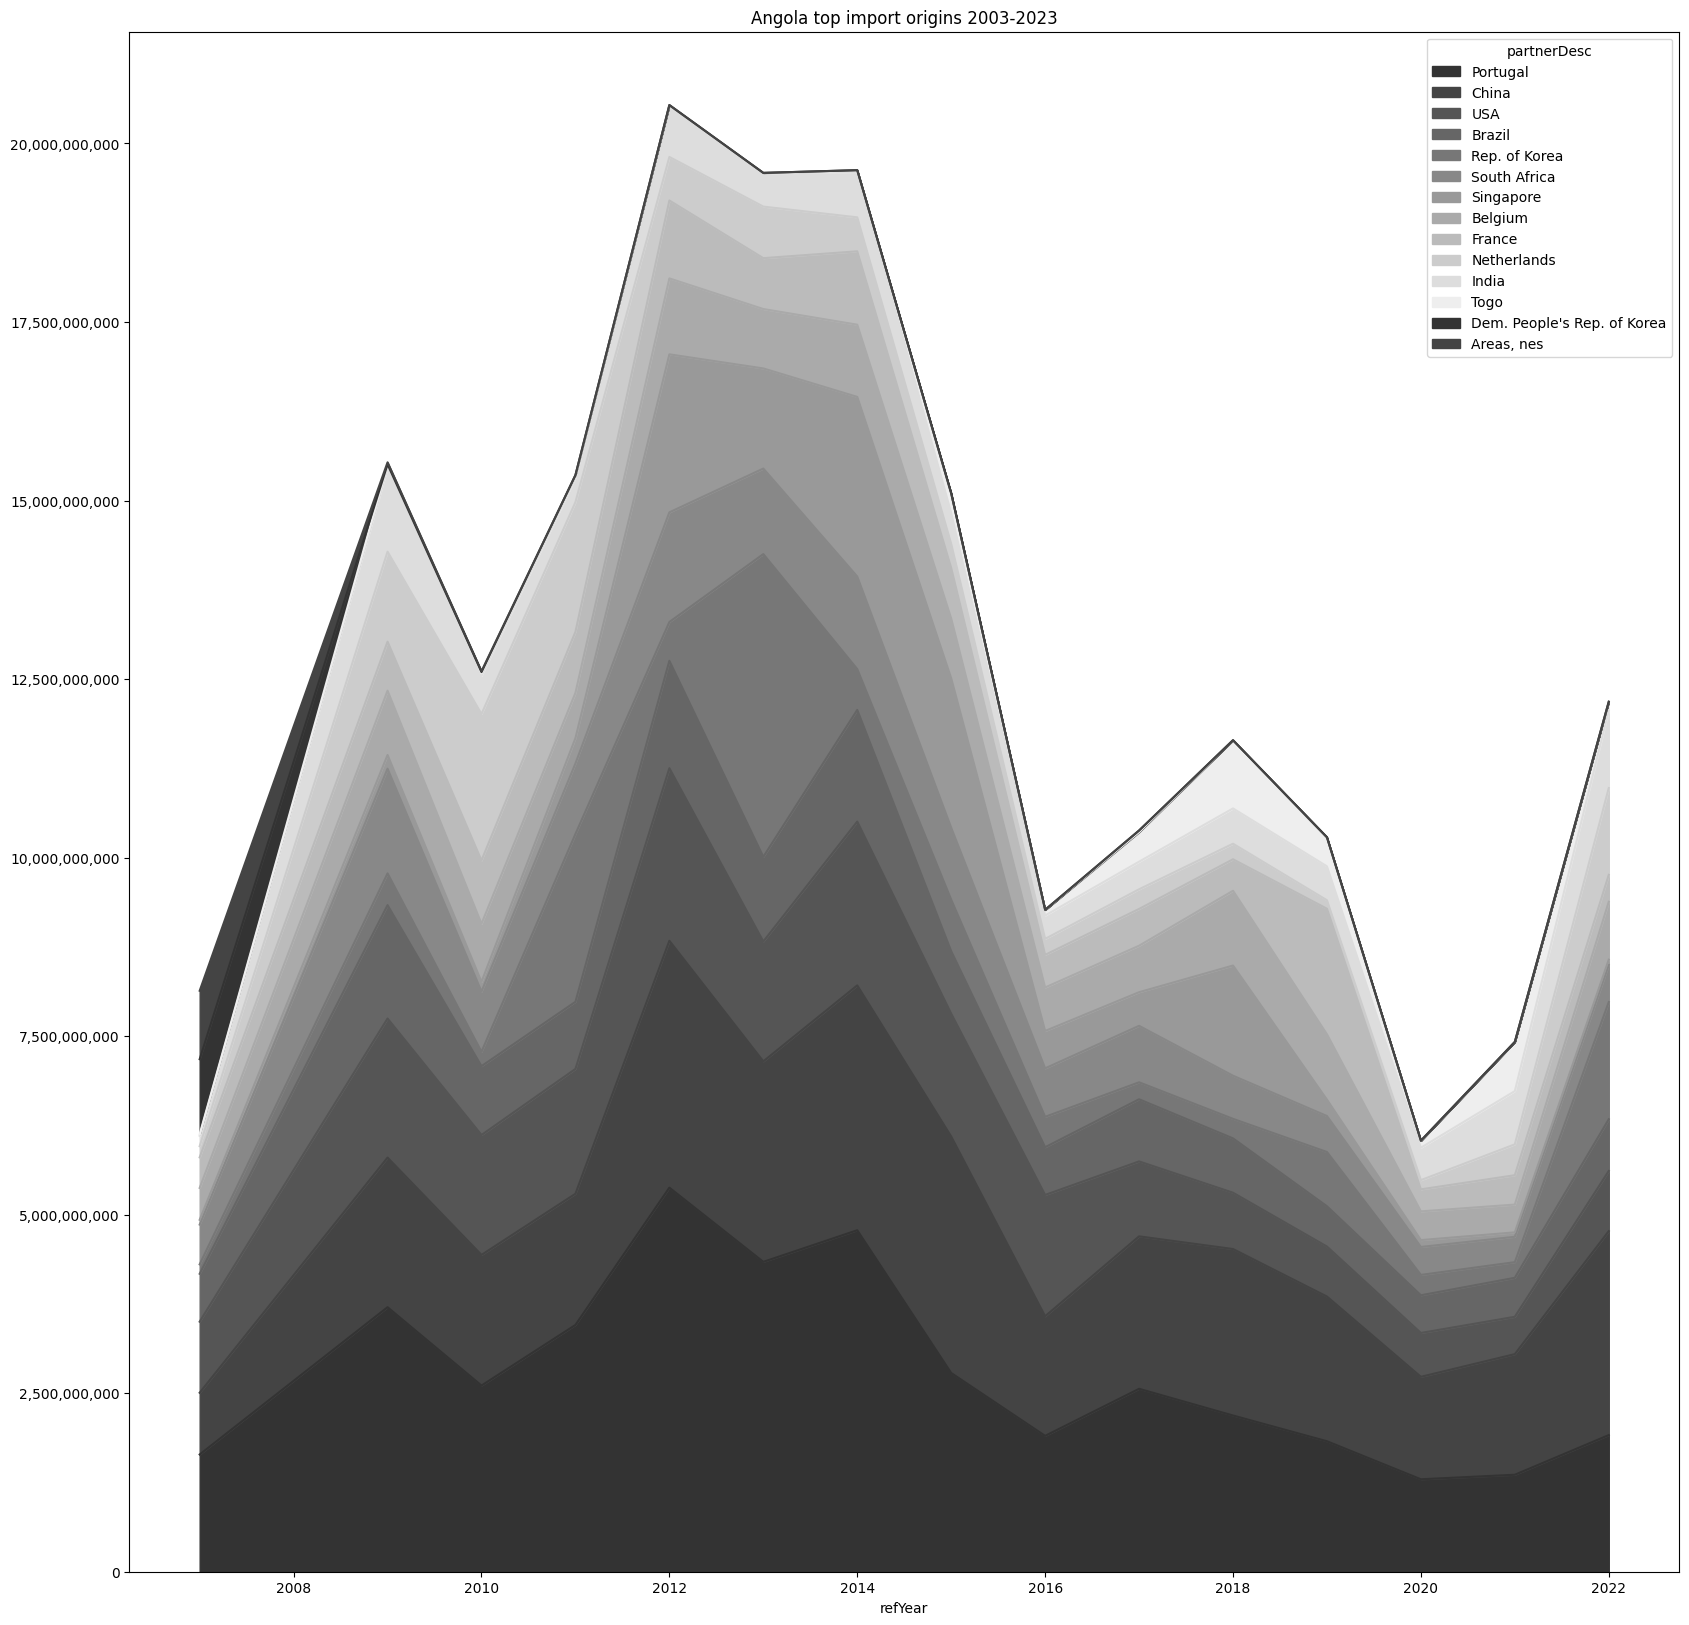

In [325]:
import matplotlib.pyplot as plt

title=f"{country_of_interest_name} top import origins {start_year}-{end_year}"
plotfile = f"reports/{country_of_interest_name}_3.1.4_import_partners_{start_year}-{end_year}.png"

# colors = ['red','lightsalmon','green','lightgreen','darkviolet','violet','blue','dodgerblue','orange','yellow','brown','black','grey','pink','cyan','magenta',]
# colors = ['crimson', 'darkorange', 'gold', 'limegreen', 'mediumseagreen', 'teal', 'deepskyblue', 'royalblue', 'indigo', 'mediumvioletred', 'hotpink', 'saddlebrown', 'grey', 'black', 'darkslategrey', 'darkkhaki']
colors = [ '#333333','#444444', '#555555', '#666666', '#777777', '#888888', '#999999', '#AAAAAA', '#BBBBBB', '#CCCCCC', '#DDDDDD', '#EEEEEE']
fig2 = values_only.plot.area(figsize=(20,20),title=title, color=colors)

for i, line in enumerate(fig2.get_lines()):
    n = i % len(colors)
    # print(i, line, colors[n])
    line.set_color(colors[n])

formatter = ticker.StrMethodFormatter('{x:,.0f}')
fig2.yaxis.set_major_formatter(formatter)

plt.savefig(plotfile)
plt.show()

In [326]:
plotfile

'reports/Angola_3.1.4_import_partners_2003-2023.png'

In [327]:
show_only_columns = [(l1, country) for l1,country in pivoted.columns.tolist() if country in top_import_partners]
list(show_only_columns)

[('partner_perc', 'Areas, nes'),
 ('partner_perc', 'Belgium'),
 ('partner_perc', 'Brazil'),
 ('partner_perc', 'China'),
 ('partner_perc', "Dem. People's Rep. of Korea"),
 ('partner_perc', 'France'),
 ('partner_perc', 'India'),
 ('partner_perc', 'Netherlands'),
 ('partner_perc', 'Portugal'),
 ('partner_perc', 'Rep. of Korea'),
 ('partner_perc', 'Singapore'),
 ('partner_perc', 'South Africa'),
 ('partner_perc', 'Togo'),
 ('partner_perc', 'USA'),
 ('primaryValue', 'Areas, nes'),
 ('primaryValue', 'Belgium'),
 ('primaryValue', 'Brazil'),
 ('primaryValue', 'China'),
 ('primaryValue', "Dem. People's Rep. of Korea"),
 ('primaryValue', 'France'),
 ('primaryValue', 'India'),
 ('primaryValue', 'Netherlands'),
 ('primaryValue', 'Portugal'),
 ('primaryValue', 'Rep. of Korea'),
 ('primaryValue', 'Singapore'),
 ('primaryValue', 'South Africa'),
 ('primaryValue', 'Togo'),
 ('primaryValue', 'USA')]

#### Export to Excel

Table with the top import origins for the period of interest

In [328]:
top_partners_file = f'reports/{country_of_interest_name}_3.1.1_top_import_partners.xlsx'
top_partners_cols_file = f'reports/{country_of_interest_name}_3.1.2_top_import_partners_cols.xlsx'
import_top_partners_file = f'reports/{country_of_interest_name}_3.1.3_import_top_{show_only_top}_partners_{start_year}-{end_year}.xlsx'

imports.to_excel(top_partners_file)
pivoted.to_excel(top_partners_cols_file)
pivoted[show_only_columns].reset_index().to_excel(import_top_partners_file)

print(f"Top import partners file: {top_partners_file}")
print(f"Top import partners cols file: {top_partners_cols_file}")
print(f"Import top partners file: {import_top_partners_file}")

Top import partners file: reports/Angola_3.1.1_top_import_partners.xlsx
Top import partners cols file: reports/Angola_3.1.2_top_import_partners_cols.xlsx
Import top partners file: reports/Angola_3.1.3_import_top_5_partners_2003-2023.xlsx


### 3.2 Imports: products

#### Main imported products

In [329]:
import pandas as pd

# show 500 lines of dataframes
pd.set_option('display.max_rows', 500)

show_only_top=5
# years_of_interest = comtrade.year_range(2020, 2021)

print(country_of_interest_name, years_of_interest)


Angola 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023


Get the products imported by country of interest

In [330]:
# If symmetric_reporting is "True" we get the exports from
#    the reported imports of all the countries
# i.e. instead of asking Country of Interest for export data we ask the world
#    for import data from Country of Interest

symmetric_reporting = False  # set to false to use reported exports by Country of Interest

if symmetric_reporting:
    reporterCode = None
    partnerCode = country_of_interest
    flowCode = 'X'
    reporter_column = 'partner'
    partner_column = 'reporter'
else:
    reporterCode = country_of_interest
    partnerCode = None
    flowCode = 'M'
    reporter_column = 'reporter'
    partner_column = 'partner'

In [331]:
import comtradetools

clCode = 'HS'
cmdDetail = 'AG6'  # AG2 aggregate two digits, top level, AG4 detail 4 digits, ... World bank uses AG6
df = comtradetools.getFinalData(
                        APIKEY,
                        reporterCode=reporterCode,
                        typeCode='C',  # commodities
                        freqCode='A',  # annual
                        flowCode=flowCode,
                        period=years_of_interest,
                        period_size=1,
                        partnerCode=partnerCode,
                        remove_world=False,
                        partner2Code=0,
                        clCode=clCode,
                        cmdCode=cmdDetail,
                        motCode=0,  # all means of transport
                        customsCode='C00',
                        includeDesc=True,
                        retry_if_empty=False,
                        cache=True
                        )
df.info()

INFO:root:Calling getFinalData for period 2003
INFO:root:Using cached results for period 2003
INFO:root:Calling getFinalData for period 2004
INFO:root:Using cached results for period 2004
INFO:root:Calling getFinalData for period 2005
INFO:root:Using cached results for period 2005
INFO:root:Calling getFinalData for period 2006
INFO:root:Using cached results for period 2006
INFO:root:Calling getFinalData for period 2007
INFO:root:Using cached results for period 2007
INFO:root:Calling getFinalData for period 2008
INFO:root:Using cached results for period 2008
INFO:root:Calling getFinalData for period 2009
INFO:root:Using cached results for period 2009
INFO:root:Calling getFinalData for period 2010
INFO:root:Using cached results for period 2010
INFO:root:Calling getFinalData for period 2011
INFO:root:Using cached results for period 2011
INFO:root:Calling getFinalData for period 2012
INFO:root:Using cached results for period 2012
INFO:root:Calling getFinalData for period 2013
INFO:root:Usi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891075 entries, 0 to 891074
Data columns (total 47 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   typeCode                  891075 non-null  object 
 1   freqCode                  891075 non-null  object 
 2   refPeriodId               891075 non-null  int64  
 3   refYear                   891075 non-null  int64  
 4   refMonth                  891075 non-null  int64  
 5   period                    891075 non-null  object 
 6   reporterCode              891075 non-null  int64  
 7   reporterISO               891075 non-null  object 
 8   reporterDesc              891075 non-null  object 
 9   flowCode                  891075 non-null  object 
 10  flowDesc                  891075 non-null  object 
 11  partnerCode               891075 non-null  int64  
 12  partnerISO                891075 non-null  object 
 13  partnerDesc               891075 non-null  o

In [332]:
print("Years available in the data:", list(df.refYear.unique()))

Years available in the data: [2007, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]


In [333]:
df.head()

,typeCode,freqCode,refPeriodId,refYear,refMonth,period,reporterCode,reporterISO,reporterDesc,flowCode,...,netWgt,isNetWgtEstimated,grossWgt,isGrossWgtEstimated,cifvalue,fobvalue,primaryValue,legacyEstimationFlag,isReported,isAggregate
0,C,A,20070101,2007,52,2007,24,AGO,Angola,M,...,8.00,False,NaN,False,217.00,NaN,217.00,0,True,False
1,C,A,20070101,2007,52,2007,24,AGO,Angola,M,...,20.00,False,NaN,False,123.00,NaN,123.00,2,True,False
2,C,A,20070101,2007,52,2007,24,AGO,Angola,M,...,85.00,False,NaN,False,185.00,NaN,185.00,0,True,False
3,C,A,20070101,2007,52,2007,24,AGO,Angola,M,...,206.00,False,NaN,False,725.00,NaN,725.00,0,True,False
4,C,A,20070101,2007,52,2007,24,AGO,Angola,M,...,"2,790.00",False,NaN,False,"10,110.00",NaN,"10,110.00",0,True,False


Agreggate by product, keep the top products imported each year

In [341]:
import pandas as pd
import comtradetools
# show 500 lines
pd.options.display.max_rows=500
pd.options.display.float_format='{:,.2f}'.format

show_only_top = 5
imports = comtradetools.total_rank_perc(df,['refYear','flowCode','cmdCode'],'primaryValue','product',drop_duplicates=True)
imports = imports[imports['product_rank']<=show_only_top]
imports.info()

cols=['refYear','flowCode','product_rank','cmdCode', 'cmdDesc','product_sum','product_upper_perc','classificationCode','aggrLevel','isLeaf', 'product_upper_sum']
formats =  comtradetools.make_format(cols)

top_import_products_codes = imports['cmdCode'].unique()

print(f"Top products imported by {country_of_interest_name} in {years_of_interest}:\n {top_import_products_codes}")
for cmdCode in top_import_products_codes:
    print(f"   {cmdCode}: {comtradetools.HS_CODES.get(cmdCode,cmdCode)}")
imports[cols].sort_values(['refYear','flowCode','product_rank']).head(10).style.format(formats)


<class 'pandas.core.frame.DataFrame'>
Index: 75 entries, 126 to 835585
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   typeCode                  75 non-null     object 
 1   freqCode                  75 non-null     object 
 2   refPeriodId               75 non-null     int64  
 3   refYear                   75 non-null     int64  
 4   refMonth                  75 non-null     int64  
 5   period                    75 non-null     object 
 6   reporterCode              75 non-null     int64  
 7   reporterISO               75 non-null     object 
 8   reporterDesc              75 non-null     object 
 9   flowCode                  75 non-null     object 
 10  flowDesc                  75 non-null     object 
 11  partnerCode               75 non-null     int64  
 12  partnerISO                75 non-null     object 
 13  partnerDesc               75 non-null     object 
 14  partner2Cod

,refYear,flowCode,product_rank,cmdCode,cmdDesc,product_sum,product_upper_perc,classificationCode,aggrLevel,isLeaf,product_upper_sum
1775,2007,M,1,843149,"Machinery; parts of machines handling earth, minerals or ores and n.e.s. in heading no. 8431","$2,163,180,713",9.749%,H2,6,True,"$22,189,687,148"
126,2007,M,2,843143,Boring or sinking machinery; parts of the machinery of item no. 8430.41 or 8430.41,"$940,396,197",4.238%,H2,6,True,"$22,189,687,148"
1748,2007,M,3,870421,"Vehicles; compression-ignition internal combustion piston engine (diesel or semi-diesel), for transport of goods, (of a gvw not exceeding 5 tonnes), nes in item no 8704.1","$486,127,495",2.191%,H2,6,True,"$22,189,687,148"
1743,2007,M,4,870323,"Vehicles; spark-ignition internal combustion reciprocating piston engine, cylinder capacity exceeding 1500cc but not exceeding 3000cc","$325,962,035",1.469%,H2,6,True,"$22,189,687,148"
3407,2007,M,5,110100,Wheat or meslin flour,"$247,315,599",1.115%,H2,6,True,"$22,189,687,148"
60131,2009,M,1,271019,"Oils; petroleum oils and oils obtained from bituminous minerals, not crude; preparations n.e.c., containing by weight 70% or more of petroleum oils or oils obtained from bituminous minerals, (excluding waste oils), other than light oils and preparations","$4,477,308,087",9.359%,H3,6,True,"$47,837,708,994"
60130,2009,M,2,271011,"Petroleum oils and oils from bituminous minerals, not crude or waste oils; preparations n.e.c. with 70% or more (weight), of petroleum oils or oils from bituminous minerals; being the basic constituents of the preparations: light oils and preparations","$2,224,822,150",4.651%,H3,6,True,"$47,837,708,994"
63771,2009,M,3,890520,Floating or submersible drilling or production platforms,"$1,310,077,119",2.739%,H3,6,True,"$47,837,708,994"
63362,2009,M,4,870421,"Vehicles; compression-ignition internal combustion piston engine (diesel or semi-diesel), for transport of goods, (of a gvw not exceeding 5 tonnes), n.e.c. in item no 8704.1","$1,076,595,302",2.251%,H3,6,True,"$47,837,708,994"
62780,2009,M,5,843143,Boring or sinking machinery; parts of the machinery of item no. 8430.41 or 8430.41,"$792,007,274",1.656%,H3,6,True,"$47,837,708,994"


### Caveat

For Angola results match https://trendeconomy.com/data/h2/Angola/TOTAL for AG2 and AG4 but not https://www.statista.com/statistics/1143152/value-of-imports-into-angola-by-category/  and close but not same as https://globaledge.msu.edu/countries/angola/tradestats

The imports match World Bank Wits data mostly, but in some years 
there seems to be a mismatch of HS Codes, with different descriptions in Wits
and values that sometimes match AG4 and not AG6 (2015,total is AG4:2710 not AG6:271012 )
and in same cases match the first 5 digits (2015: 73042 "Casings tubing...", 2021 10011, Durum Wheat)

Use the following cell to compute totals for codes with first 5 digit in common to compare with other sources

In [340]:
import pandas as pd

pd.set_option('display.max_colwidth', 200)
pd.options.display.float_format = '{:,.2f}'.format

code_prefix = '10011'
cols=['refYear','flowCode','cmdCode','cmdDesc', 'classificationCode','aggrLevel','primaryValue','product_rank','product_perc']

# select rows and columns
selected_rows = df[(df['refYear']==2021) & (df['cmdCode'].str.startswith(code_prefix))][cols].sort_values(by=['primaryValue'],ascending=False).head(50)

# add total of primaryValue column
total = selected_rows['primaryValue'].sum()
selected_rows.loc['Total'] = pd.Series({'primaryValue': total})

# display selected rows
selected_rows


,refYear,flowCode,cmdCode,cmdDesc,classificationCode,aggrLevel,primaryValue,product_rank,product_perc
775232,"2,021.00",M,100119,"Cereals; wheat and meslin, durum wheat, other than seed",H5,6.00,"227,412,579.20",2.00,0.01
775234,"2,021.00",M,100119,"Cereals; wheat and meslin, durum wheat, other than seed",H5,6.00,"111,891,038.52",2.00,0.00
775239,"2,021.00",M,100119,"Cereals; wheat and meslin, durum wheat, other than seed",H5,6.00,"57,244,189.03",2.00,0.00
775233,"2,021.00",M,100119,"Cereals; wheat and meslin, durum wheat, other than seed",H5,6.00,"28,665,369.69",2.00,0.00
775235,"2,021.00",M,100119,"Cereals; wheat and meslin, durum wheat, other than seed",H5,6.00,"12,131,357.73",2.00,0.00
775241,"2,021.00",M,100119,"Cereals; wheat and meslin, durum wheat, other than seed",H5,6.00,"7,707,737.18",2.00,0.00
775236,"2,021.00",M,100119,"Cereals; wheat and meslin, durum wheat, other than seed",H5,6.00,"4,055,544.08",2.00,0.00
775237,"2,021.00",M,100119,"Cereals; wheat and meslin, durum wheat, other than seed",H5,6.00,"3,836,516.45",2.00,0.00
775226,"2,021.00",M,100111,"Cereals; wheat and meslin, durum wheat, seed",H5,6.00,"2,305,159.68",632.00,0.00
775229,"2,021.00",M,100111,"Cereals; wheat and meslin, durum wheat, seed",H5,6.00,"1,984,050.50",632.00,0.00


In [342]:
print("Years available in the data:", list(imports.refYear.unique()))

Years available in the data: [2007, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]


#### Export to Excel

In [343]:
filename = f'reports/{country_of_interest_name}_3.2_imports_products_{clCode}-{cmdDetail}-{imports["refYear"].min()}-{imports["refYear"].max()}.xlsx'
print("Exporting to ",filename)
imports[cols].sort_values(['refYear','flowCode','product_rank']).to_excel(filename,index=False)

Exporting to  reports/Angola_3.2_imports_products_HS-AG6-2007-2022.xlsx


### 3.3 Import partners / product analysis

Which are the partners selling the top imports by country of interest

In [344]:
# If symmetric_reporting is "True" we get the exports from
#    the reported imports of all the countries
# i.e. instead of asking Country of Interest for export data we ask the world
#    for import data from Country of Interest

symmetric_reporting = False  # set to false to use reported exports by Country of Interest

if symmetric_reporting:
    reporterCode = None
    partnerCode = country_of_interest
    flowCode = 'X'
    reporter_column = 'partner'
    partner_column = 'reporter'
else:
    reporterCode = country_of_interest
    partnerCode = None
    flowCode = 'M'
    reporter_column = 'reporter'
    partner_column = 'partner'

In [345]:
import warnings
warnings.filterwarnings('default')

clCode = 'HS'
cmdDetail = 'AG6'  # not all countries report at higher detail

df = comtradetools.getFinalData(
                        APIKEY,
                        reporterCode=reporterCode,
                        typeCode='C',  # commodities
                        freqCode='A',  # annual
                        flowCode=flowCode,
                        period=years_of_interest,
                        period_size=1, # lots of data, better segment
                        partnerCode=partnerCode,
                        remove_world=False,
                        partner2Code=0,
                        clCode=clCode,
                        cmdCode=cmdDetail,
                        motCode=0,  # all means of transport
                        customsCode='C00',
                        includeDesc=True,
                        retry_if_empty=False,
                        cache=True
                        )
df.info()

INFO:root:Calling getFinalData for period 2003
INFO:root:Using cached results for period 2003
INFO:root:Calling getFinalData for period 2004
INFO:root:Using cached results for period 2004
INFO:root:Calling getFinalData for period 2005
INFO:root:Using cached results for period 2005
INFO:root:Calling getFinalData for period 2006
INFO:root:Using cached results for period 2006
INFO:root:Calling getFinalData for period 2007
INFO:root:Using cached results for period 2007
INFO:root:Calling getFinalData for period 2008
INFO:root:Using cached results for period 2008
INFO:root:Calling getFinalData for period 2009
INFO:root:Using cached results for period 2009
INFO:root:Calling getFinalData for period 2010
INFO:root:Using cached results for period 2010
INFO:root:Calling getFinalData for period 2011
INFO:root:Using cached results for period 2011
INFO:root:Calling getFinalData for period 2012
INFO:root:Using cached results for period 2012
INFO:root:Calling getFinalData for period 2013
INFO:root:Usi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891075 entries, 0 to 891074
Data columns (total 47 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   typeCode                  891075 non-null  object 
 1   freqCode                  891075 non-null  object 
 2   refPeriodId               891075 non-null  int64  
 3   refYear                   891075 non-null  int64  
 4   refMonth                  891075 non-null  int64  
 5   period                    891075 non-null  object 
 6   reporterCode              891075 non-null  int64  
 7   reporterISO               891075 non-null  object 
 8   reporterDesc              891075 non-null  object 
 9   flowCode                  891075 non-null  object 
 10  flowDesc                  891075 non-null  object 
 11  partnerCode               891075 non-null  int64  
 12  partnerISO                891075 non-null  object 
 13  partnerDesc               891075 non-null  o

In [346]:
cols2=['refYear','flowCode','reporterDesc','partnerDesc','primaryValue','cmdCode','cmdDesc']
df[cols2].sample(10)

,refYear,flowCode,reporterDesc,partnerDesc,primaryValue,cmdCode,cmdDesc
493864,2015,M,Angola,World,812.64,930520,"Firearms; parts and accessories, of shotguns or rifles of heading 9303"
226457,2011,M,Angola,India,15.00,820110,"Tools, hand; spades and shovels"
360137,2013,M,Angola,Sweden,"1,694.00",490290,"Newspapers, journals and periodicals; whether or not illustrated or containing advertising material, appearing less frequently than four times a week"
785463,2021,M,Angola,France,"17,219.12",392062,"Plastics; plates, sheets, film, foil and strip (not self-adhesive), of poly(ethylene terephthalate), non-cellular and not reinforced, laminated, supported or similarly combined with other materials"
273507,2012,M,Angola,Lebanon,11.00,610339,"Jackets and blazers; men's or boys', of textile materials (other than wool or fine animal hair, cotton or synthetic fibres), knitted or crocheted"
779398,2021,M,Angola,World,61.27,283330,Alums
61053,2009,M,Angola,World,"1,605,103.00",460219,"Basketwork, wickerwork and other articles; of vegetable materials (not bamboo or rattan), made directly to shape from plaiting materials or made up from goods of heading no. 4601; articles of loofah"
413106,2014,M,Angola,Portugal,"61,230.00",330741,"Perfumes and deodorizers; perfuming or deodorizing preparations for rooms, agarbatti and other odoriferous preparations which operate by burning (including those used during religious rites)"
88864,2009,M,Angola,Jordan,"1,436.00",903180,"Instruments, appliances and machines; for measuring or checking n.e.c. in chapter 90"
404739,2014,M,Angola,Malta,"1,396.00",253090,Mineral substances; n.e.c. in chapter 25


In [215]:
df.refYear.unique()

array([2007, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020, 2021, 2022])

Aggregate by partner and keep the main ones

In [347]:
import pandas as pd
import comtradetools
import warnings

# show 500 lines
pd.options.display.max_rows=500
pd.options.display.float_format='{:,.2f}'.format

show_only_top = 5   # change to have more top partners

print(f"Top products imported by {country_of_interest_name} in {years_of_interest}:\n {top_import_products_codes}")
for cmdCode in top_import_products_codes:
    print(f"   {cmdCode}: {comtradetools.HS_CODES.get(cmdCode,cmdCode)}")

print(f"Top import partners ({len(top_import_partners)}): {top_import_partners}")
prefix='cmd_partner'
# remove world
if 0 in df[f'{partner_column}Code'].unique():
    warnings.warn("Removing world from data")
    df = df[df[f'{partner_column}Code']!=0]

products_and_partners = comtradetools.total_rank_perc(df,['refYear','flowCode','cmdCode',f'{partner_column}Code'],'primaryValue',prefix,drop_duplicates=True)
cols=['refYear','flowCode','cmdDesc','cmdCode',f'{partner_column}Desc',f'{prefix}_rank',f'{prefix}_sum',f'{prefix}_perc',f'{prefix}_upper_sum']
formats=comtradetools.make_format(cols)

products_and_partners=products_and_partners[(products_and_partners['cmdCode'].isin(top_import_products_codes)
                        & (products_and_partners[f'{prefix}_rank']<=show_only_top))]
print(f"Data available for years {products_and_partners.refYear.unique()}")


Top products imported by Angola in 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023:
 ['843143' '870323' '870421' '843149' '110100' '271011' '271019' '890520'
 '848180' '020714' '890120' '890590' '271012' '870322' '999999' '848140'
 '841182' '100630' '490700' '100119' '151190' '870210']
   843143: Boring or sinking machinery; parts for boring or sinking machinery of subheading 8430.41 or 8430.49
   870323: Vehicles; with only spark-ignition internal combustion reciprocating piston engine, cylinder capacity over 1500 but not over 3000cc
   870421: Vehicles; with only compression-ignition internal combustion piston engine (diesel or semi-diesel), for transport of goods, (of a gvw not exceeding 5 tonnes), n.e.c. in item no 8704.1
   843149: Machinery; parts of machines handling earth, minerals or ores and n.e.c. in heading no. 8431
   110100: Wheat or meslin flour
   271011: 271011
   271019: Petroleum oils and oils from bituminous m

/var/folders/x7/qzytnd752559g0w475rfwkx00000gn/T/ipykernel_7784/890561552.py:19: UserWarning: Removing world from data
  warnings.warn("Removing world from data")


Data available for years [2007 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021
 2022]


### Partners for main import products

In [348]:
products_and_partners[cols].sort_values(['refYear','flowCode',f'{prefix}_upper_sum',f'{prefix}_rank'],
                                        ascending=[True,True,False,True])\
                                            .head(30).style.format(formats) #.hide(axis='index')

,refYear,flowCode,cmdDesc,cmdCode,partnerDesc,cmd_partner_rank,cmd_partner_sum,cmd_partner_perc,cmd_partner_upper_sum
54357,2007,M,"Machinery; parts of machines handling earth, minerals or ores and n.e.s. in heading no. 8431",843149,Dem. People's Rep. of Korea,1,"$1,039,649,019",96.122%,"$1,081,590,356"
24201,2007,M,"Machinery; parts of machines handling earth, minerals or ores and n.e.s. in heading no. 8431",843149,United Arab Emirates,2,"$9,563,877",0.884%,"$1,081,590,356"
33374,2007,M,"Machinery; parts of machines handling earth, minerals or ores and n.e.s. in heading no. 8431",843149,South Africa,3,"$5,292,918",0.489%,"$1,081,590,356"
31536,2007,M,"Machinery; parts of machines handling earth, minerals or ores and n.e.s. in heading no. 8431",843149,Portugal,4,"$5,250,428",0.485%,"$1,081,590,356"
6463,2007,M,"Machinery; parts of machines handling earth, minerals or ores and n.e.s. in heading no. 8431",843149,"Areas, nes",5,"$4,743,899",0.439%,"$1,081,590,356"
26484,2007,M,Boring or sinking machinery; parts of the machinery of item no. 8430.41 or 8430.41,843143,USA,1,"$161,572,074",34.363%,"$470,198,099"
6462,2007,M,Boring or sinking machinery; parts of the machinery of item no. 8430.41 or 8430.41,843143,"Areas, nes",2,"$96,329,985",20.487%,"$470,198,099"
46429,2007,M,Boring or sinking machinery; parts of the machinery of item no. 8430.41 or 8430.41,843143,United Kingdom,3,"$75,352,980",16.026%,"$470,198,099"
13664,2007,M,Boring or sinking machinery; parts of the machinery of item no. 8430.41 or 8430.41,843143,Belgium,4,"$24,810,812",5.277%,"$470,198,099"
27411,2007,M,Boring or sinking machinery; parts of the machinery of item no. 8430.41 or 8430.41,843143,Denmark,5,"$20,692,632",4.401%,"$470,198,099"


In [349]:
filename = f'reports/{country_of_interest_name}_3.3_imports_products_partners_{clCode}-{cmdDetail}-{products_and_partners["refYear"].min()}-{products_and_partners["refYear"].max()}.xlsx'
print("Exporting to ",filename)
products_and_partners[cols].sort_values(['refYear','flowCode',f'{prefix}_upper_sum',f'{prefix}_rank'],
                                        ascending=[True,True,False,True]).to_excel(filename, index=False)

Exporting to  reports/Angola_3.3_imports_products_partners_HS-AG6-2007-2022.xlsx


### 3.4 Main partners and main products imported by country of interest

Detail of the main products by import partner.

Allows to analyse the mix of products of the main suppliers from this country.



In [350]:
top_import_partners

array(['China', "Dem. People's Rep. of Korea", 'Portugal', 'USA',
       'Areas, nes', 'Brazil', 'South Africa', 'Netherlands',
       'Rep. of Korea', 'Singapore', 'Belgium', 'Togo', 'France', 'India'],
      dtype=object)

In [352]:
import comtradetools

show_only_top = 5  # for suppliers with wide range of products e.g PT->AO increase

print(f"Top import partners ({len(top_import_partners)}): {top_import_partners}")
prefix='partner_cmd'
suppliers_and_products = comtradetools.total_rank_perc(df,['refYear','flowCode',f'{partner_column}Code','cmdCode'],'primaryValue',prefix,drop_duplicates=False)

cols=['refYear','flowCode',f'{partner_column}Desc',f'{prefix}_rank','cmdCode','cmdDesc',f'{prefix}_sum',f'{prefix}_perc',f'{prefix}_upper_sum']
formats = comtradetools.make_format(cols)
suppliers_and_products=suppliers_and_products[(suppliers_and_products[f'{partner_column}Desc'].isin(top_import_partners)
                       & (suppliers_and_products[f'{prefix}_rank']<=show_only_top))]

print("First rows")
suppliers_and_products[suppliers_and_products[f'{prefix}_rank']<=show_only_top][cols].sort_values(
    ['refYear','flowCode','partner_cmd_upper_sum',f'{prefix}_sum',f'{prefix}_rank'],
    ascending=[True,True,False,False,False]).head(10).style.format(formats).hide(axis='index')

Top import partners (14): ['China' "Dem. People's Rep. of Korea" 'Portugal' 'USA' 'Areas, nes'
 'Brazil' 'South Africa' 'Netherlands' 'Rep. of Korea' 'Singapore'
 'Belgium' 'Togo' 'France' 'India']
First rows


refYear,flowCode,partnerDesc,partner_cmd_rank,cmdCode,cmdDesc,partner_cmd_sum,partner_cmd_perc,partner_cmd_upper_sum
2007,M,Portugal,1,220300,Beer; made from malt,"$75,084,327",4.574%,"$1,641,640,150"
2007,M,Portugal,2,220421,"Wine; still, in containers holding 2 litres or less","$41,264,247",2.514%,"$1,641,640,150"
2007,M,Portugal,3,160100,"Meat preparations; sausages and similar products, of meat, meat offal or blood, and food preparations based on these products","$39,855,691",2.428%,"$1,641,640,150"
2007,M,Portugal,4,730890,"Iron or steel; structures and parts thereof, n.e.s. in heading no. 7308","$30,750,844",1.873%,"$1,641,640,150"
2007,M,Portugal,5,854459,"Insulated electric conductors; for a voltage exceeding 80 volts but not exceeding 1000 volts, not fitted with connectors","$25,746,766",1.568%,"$1,641,640,150"
2007,M,Dem. People's Rep. of Korea,1,843149,"Machinery; parts of machines handling earth, minerals or ores and n.e.s. in heading no. 8431","$1,039,649,019",98.908%,"$1,051,122,769"
2007,M,Dem. People's Rep. of Korea,2,271019,"Oils; petroleum oils and oils obtained from bituminous minerals, not crude; preparations n.e.c., containing by weight 70% or more of petroleum oils or oils obtained from bituminous minerals, (excluding waste oils), other than light oils and preparations","$7,774,287",0.740%,"$1,051,122,769"
2007,M,Dem. People's Rep. of Korea,3,390210,"Propylene, other olefin polymers; polypropylene in primary forms","$734,982",0.070%,"$1,051,122,769"
2007,M,Dem. People's Rep. of Korea,4,847989,"Machines and mechanical appliances; n.e.s. in item no. 8479.8, having individual functions","$636,208",0.061%,"$1,051,122,769"
2007,M,Dem. People's Rep. of Korea,5,731815,"Iron or steel; threaded screws and bolts n.e.s. in item no. 7318.1, whether or not with their nuts or washers","$563,435",0.054%,"$1,051,122,769"


Last rows

In [355]:

suppliers_and_products[suppliers_and_products[f'{prefix}_rank']<=show_only_top][cols].sort_values(
    ['refYear','flowCode','partner_cmd_upper_sum',f'{prefix}_sum',f'{prefix}_rank'],
    ascending=[True,True,False,False,False]).tail(10).style.format(formats).hide(axis='index')

refYear,flowCode,partnerDesc,partner_cmd_rank,cmdCode,cmdDesc,partner_cmd_sum,partner_cmd_perc,partner_cmd_upper_sum
2022,M,Singapore,3,730520,"Iron or steel (excluding cast iron); casing of a kind used in drilling for oil or gas (not seamless), having circular cross-sections, external diameter exceeds 406.4mm","$5,128,630",7.023%,"$73,021,366"
2022,M,Singapore,4,848180,"Taps, cocks, valves and similar appliances; for pipes, boiler shells, tanks, vats or the like, including thermostatically controlled valves","$3,719,977",5.094%,"$73,021,366"
2022,M,Singapore,5,890590,"Vessels; light, fire-floats, floating cranes and other vessels, the navigability of which is subsidiary to their main function, floating docks","$3,676,436",5.035%,"$73,021,366"
2022,M,Dem. People's Rep. of Korea,1,870323,"Vehicles; with only spark-ignition internal combustion reciprocating piston engine, cylinder capacity over 1500 but not over 3000cc","$682,614",19.335%,"$3,530,526"
2022,M,Dem. People's Rep. of Korea,2,390230,"Propylene, other olefin polymers; propylene copolymers in primary forms","$305,958",8.666%,"$3,530,526"
2022,M,Dem. People's Rep. of Korea,3,730890,"Iron or steel; structures and parts thereof, n.e.c. in heading 7308","$271,074",7.678%,"$3,530,526"
2022,M,Dem. People's Rep. of Korea,4,390110,"Ethylene polymers; in primary forms, polyethylene having a specific gravity of less than 0.94","$242,268",6.862%,"$3,530,526"
2022,M,Dem. People's Rep. of Korea,5,390210,"Propylene, other olefin polymers; polypropylene in primary forms","$230,126",6.518%,"$3,530,526"
2022,M,"Areas, nes",1,401693,"Rubber; vulcanised (other than hard rubber), gaskets, washers and other seals, of non-cellular rubber",$829,69.540%,"$1,192"
2022,M,"Areas, nes",2,870840,Vehicle parts; gear boxes and parts thereof,$363,30.460%,"$1,192"


#### Export to Excel

In [357]:
filename = f'reports/{country_of_interest_name}_3.4_imports_partners_products_{clCode}-{cmdDetail}-{products_and_partners["refYear"].min()}-{products_and_partners["refYear"].max()}.xlsx'

suppliers_and_products[suppliers_and_products[f'{prefix}_rank']<=show_only_top][cols].sort_values(
    ['refYear','flowCode','partner_cmd_upper_sum',f'{prefix}_sum',f'{prefix}_rank'],
    ascending=[True,True,False,False,False]).to_excel(filename, index=False)

print("Exporting to ",filename)

Exporting to  reports/Angola_3.4_imports_partners_products_HS-AG6-2007-2022.xlsx


### 3.5 Get the alternative clients for country of interest suppliers

For each year, supplier, imported commodity, fetch all the 
exports of the commodity by the supplier to other countries, and
compute the ranking of country of interest among the clients
of partner for that commodity.

Country of interest: Angola, in 2022 Argentina was #1 supplier of Angola for commodity
code 100119 "Cereals; wheat and meslin, durum wheat, other than seed"; fetch all the clients of Argentina for 100119 and compute the ranking of Angola.

First step is to get the combos os partner and commodity.



In [358]:
top_import_products_codes

array(['843143', '870323', '870421', '843149', '110100', '271011',
       '271019', '890520', '848180', '020714', '890120', '890590',
       '271012', '870322', '999999', '848140', '841182', '100630',
       '490700', '100119', '151190', '870210'], dtype=object)

In [359]:
combos_of_interest = suppliers_and_products[(suppliers_and_products['cmdCode'].isin(top_import_products_codes)
                & (suppliers_and_products[f'{partner_column}Code'].isin(top_import_partners_codes)))][[f'{partner_column}Code','cmdCode']].drop_duplicates()
combos_of_interest = [tuple(x) for x in combos_of_interest.values]
len(combos_of_interest)

96

In [360]:
# create lists of commodities codes and country codes to query comtrade
cmdCode_list = [cmdCode for (countryCode,cmdCode) in combos_of_interest]
cmdCode_list = list(set(cmdCode_list))
countryCode_list = [countryCode for (countryCode,cmdCode) in combos_of_interest]
countryCode_list = list(set(countryCode_list))
cmdCodeCSV = ','.join(cmdCode_list)
countryCodeCSV = ','.join(map(str,countryCode_list))

Get the all clients of suppliers for the products imported by country of interest

In [361]:
print("Years of interest: ", years_of_interest)
print("countryCodeCSV: ", countryCodeCSV)
print("cmdCodeCSV: ", cmdCodeCSV)

df = comtradetools.getFinalData(APIKEY,
                                typeCode='C',  # commodities
                                freqCode='A',  # annual
                                flowCode='X',
                                reporterCode=countryCodeCSV,
                                partnerCode=None,
                                remove_world=True,
                                partner2Code=0,
                                period=years_of_interest,
                                period_size=1,
                                clCode=clCode,
                                cmdCode=cmdCodeCSV,  # Top level product types
                                motCode=0,  # all means of transport
                                customsCode='C00',
                                includeDesc=True,
                                retry_if_empty=False,
                                cache=True,

                                )

INFO:root:Calling getFinalData for period 2003
INFO:root:Using cached results for period 2003
INFO:root:Calling getFinalData for period 2004
INFO:root:Using cached results for period 2004


Years of interest:  2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
countryCodeCSV:  768,899,408,710,842,76,620,528,56,410,251,156,699,702
cmdCodeCSV:  841182,843149,890590,999999,890520,020714,271019,100630,490700,870323,870210,110100,890120,100119,151190,271012,848180,271011,870322,843143,870421


INFO:root:Calling getFinalData for period 2005
INFO:root:Using cached results for period 2005
INFO:root:Calling getFinalData for period 2006
INFO:root:Using cached results for period 2006
INFO:root:Calling getFinalData for period 2007
INFO:root:Using cached results for period 2007
INFO:root:Calling getFinalData for period 2008
INFO:root:Using cached results for period 2008
INFO:root:Calling getFinalData for period 2009
INFO:root:Using cached results for period 2009
INFO:root:Calling getFinalData for period 2010
INFO:root:Using cached results for period 2010
/Users/jrc/develop/cipf-comtrade/comtradetools.py:652: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, temp], ignore_index=True)
INFO:root:Calling getFinalData for peri

Countries also buying top imports of country of interest from the same suppliers

In [362]:
list(df.reporterDesc.unique()), list(df.partnerDesc.unique())


(['Belgium',
  'Brazil',
  'China',
  'France',
  'Rep. of Korea',
  'Portugal',
  'Netherlands',
  'South Africa',
  'Singapore',
  'India',
  'Togo',
  'USA'],
 ['Albania',
  'Antarctica',
  'Algeria',
  'Angola',
  'Antigua and Barbuda',
  'Azerbaijan',
  'Argentina',
  'Australia',
  'Austria',
  'Bahrain',
  'Bangladesh',
  'Barbados',
  'Bermuda',
  'Armenia',
  'Bolivia (Plurinational State of)',
  'Botswana',
  'Bosnia Herzegovina',
  'Brazil',
  'Belize',
  'Solomon Isds',
  'Brunei Darussalam',
  'Bulgaria',
  'Burundi',
  'Belarus',
  'Cameroon',
  'Canada',
  'Central African Rep.',
  'Sri Lanka',
  'Chad',
  'Chile',
  'China',
  'Colombia',
  'Comoros',
  'Mayotte (Overseas France)',
  'Congo',
  'Dem. Rep. of the Congo',
  'Costa Rica',
  'Croatia',
  'Cuba',
  'Cyprus',
  'Czechia',
  'Benin',
  'Denmark',
  'Dominica',
  'Dominican Rep.',
  'El Salvador',
  'Ecuador',
  'Equatorial Guinea',
  'Ethiopia',
  'Eritrea',
  'Estonia',
  'Faeroe Isds',
  'Fiji',
  'Finland',

### Ranking of country of interest in the costumers of main suppliers
Allows assessment of the importance of country of interest for the partners
that are selling its main imports.

It allows for restricting rank, avoiding irrelevant matchess

For each supplier show the top costumers of the products bought by country of interest. 

If country of interest is not in the top five constumers, show position anyway if it is a supplier in the given year 

In [366]:
import pandas as pd
import comtradetools

#  set max rows to 500
pd.set_option('display.max_rows', 1500)


other_costumers = comtradetools.total_rank_perc(
                                        df,
                                        groupby=['refYear','flowCode','reporterCode','cmdCode','partnerCode'],
                                        col='primaryValue',
                                        prefix='cmd_partner',
                                        )

other_costumers = other_costumers[other_costumers[['reporterCode','cmdCode']].apply(tuple,axis=1).isin(combos_of_interest)]
cols=['reporterDesc','cmdCode','cmdDesc','refYear','partnerDesc','cmd_partner_rank','primaryValue','cmd_partner_perc','cmd_partner_upper_sum']
formats =  comtradetools.make_format(cols)

other_costumers[(other_costumers['partnerCode'] == country_of_interest)
                | (other_costumers['cmd_partner_rank']<=show_only_top)
                ][cols].sort_values(by=['reporterDesc','cmdCode','refYear','cmd_partner_rank']).head(20).style.format(formats).hide(axis="index")

reporterDesc,cmdCode,cmdDesc,refYear,partnerDesc,cmd_partner_rank,primaryValue,cmd_partner_perc,cmd_partner_upper_sum
Belgium,110100,Wheat or meslin flour,2003,Netherlands,1,"$72,432,597",36.107%,"$200,604,443"
Belgium,110100,Wheat or meslin flour,2003,Angola,2,"$30,955,930",15.431%,"$200,604,443"
Belgium,110100,Wheat or meslin flour,2003,France,3,"$26,141,710",13.031%,"$200,604,443"
Belgium,110100,Wheat or meslin flour,2003,Libya,4,"$22,250,612",11.092%,"$200,604,443"
Belgium,110100,Wheat or meslin flour,2003,Indonesia,5,"$13,053,775",6.507%,"$200,604,443"
Belgium,110100,Wheat or meslin flour,2004,Netherlands,1,"$82,677,898",36.808%,"$224,619,378"
Belgium,110100,Wheat or meslin flour,2004,Libya,2,"$37,678,327",16.774%,"$224,619,378"
Belgium,110100,Wheat or meslin flour,2004,Angola,3,"$35,706,367",15.896%,"$224,619,378"
Belgium,110100,Wheat or meslin flour,2004,France,4,"$32,612,168",14.519%,"$224,619,378"
Belgium,110100,Wheat or meslin flour,2004,Dem. Rep. of the Congo,5,"$5,313,547",2.366%,"$224,619,378"


In [371]:
ignore_if_rank_is_higher = 25

relevant_for_partner_exports=other_costumers[
    (other_costumers['partnerCode'] == country_of_interest) &
    (other_costumers['cmd_partner_rank'] < ignore_if_rank_is_higher)
][cols].sort_values(by=['reporterDesc','cmdCode','refYear','cmd_partner_rank'])
relevant_for_partner_exports.head(10).style.format(formats).hide(axis='index')

reporterDesc,cmdCode,cmdDesc,refYear,partnerDesc,cmd_partner_rank,primaryValue,cmd_partner_perc,cmd_partner_upper_sum
Belgium,110100,Wheat or meslin flour,2003,Angola,2,"$30,955,930",15.431%,"$200,604,443"
Belgium,110100,Wheat or meslin flour,2004,Angola,3,"$35,706,367",15.896%,"$224,619,378"
Belgium,110100,Wheat or meslin flour,2005,Angola,2,"$30,428,565",15.478%,"$196,586,107"
Belgium,110100,Wheat or meslin flour,2006,Angola,2,"$38,034,292",20.108%,"$189,153,344"
Belgium,110100,Wheat or meslin flour,2007,Angola,2,"$56,202,823",19.971%,"$281,418,401"
Belgium,110100,Wheat or meslin flour,2008,Angola,2,"$62,116,248",16.013%,"$387,908,681"
Belgium,110100,Wheat or meslin flour,2009,Angola,2,"$27,871,454",11.216%,"$248,487,897"
Belgium,110100,Wheat or meslin flour,2010,Angola,2,"$41,695,532",18.301%,"$227,830,844"
Belgium,110100,Wheat or meslin flour,2011,Angola,3,"$19,005,160",7.594%,"$250,280,009"
Belgium,110100,Wheat or meslin flour,2012,Angola,2,"$33,056,094",13.779%,"$239,896,771"


#### Export to Excel


In [369]:
filename = filename = f'reports/{country_of_interest_name}_3.5.1_import_partners_alternative.xlsx'

other_costumers[(other_costumers['partnerCode'] == country_of_interest)
                | (other_costumers['cmd_partner_rank']<=show_only_top)
                ][cols].sort_values(by=['reporterDesc','cmdCode','refYear','cmd_partner_rank']).to_excel(filename, index=False)
print("Exporting to ",filename)

Exporting to  reports/Angola_3.5.1_import_partners_alternative.xlsx


In [373]:
filename = f'reports/{country_of_interest_name}_3.5.2_import_partners_alternative_relevant.xlsx'

relevant_for_partner_exports.to_excel(filename, index=False)
print("Exporting to ",filename)

Exporting to  reports/Angola_3.5.2_import_partners_alternative_relevant.xlsx
